# House Price Prediction - `Regression`

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. 

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
#Reading and taking a look at the top 5 rows
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Checking the shape of the dataset
df.shape

(1460, 81)

In [4]:
#Information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Description of the numerical columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Checking the categories in categorical columns
for i in df.columns:
    if df[i].nunique() < 25:
        print(i+' (%)')
        print('`'*50)
        print(round(df[i].value_counts(normalize=True, dropna=False),4)*100)
        print()

MSSubClass (%)
``````````````````````````````````````````````````
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64

MSZoning (%)
``````````````````````````````````````````````````
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

Street (%)
``````````````````````````````````````````````````
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

Alley (%)
``````````````````````````````````````````````````
NaN     93.77
Grvl     3.42
Pave     2.81
Name: Alley, dtype: float64

LotShape (%)
``````````````````````````````````````````````````
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

LandContour (%)
``````````````````````````````````````````````````
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name:

__Observations:__
1. Most of the columns are extremely-skewed. These will have to be dropped since the amount of variance provided is extremely low.
    - If a single subcategory has `> 88%` data, we will call it a __skewed categorical column.__
2. Some columns are slightly skewed, but they are still acceptable. We will decide their significance basde on further analysis.

In [7]:
#Function to check null values
def null_check(df, heatmap=False):
    if heatmap:
        plt.figure(figsize=(15,12))
        sns.heatmap(df.isnull())
        plt.show()
    
    nulls = pd.DataFrame({'count':df.isnull().sum(),'percent':round(df.isnull().sum()*100/df.shape[0],2)})
    return nulls[nulls['count']>0].sort_values('count',ascending=False)

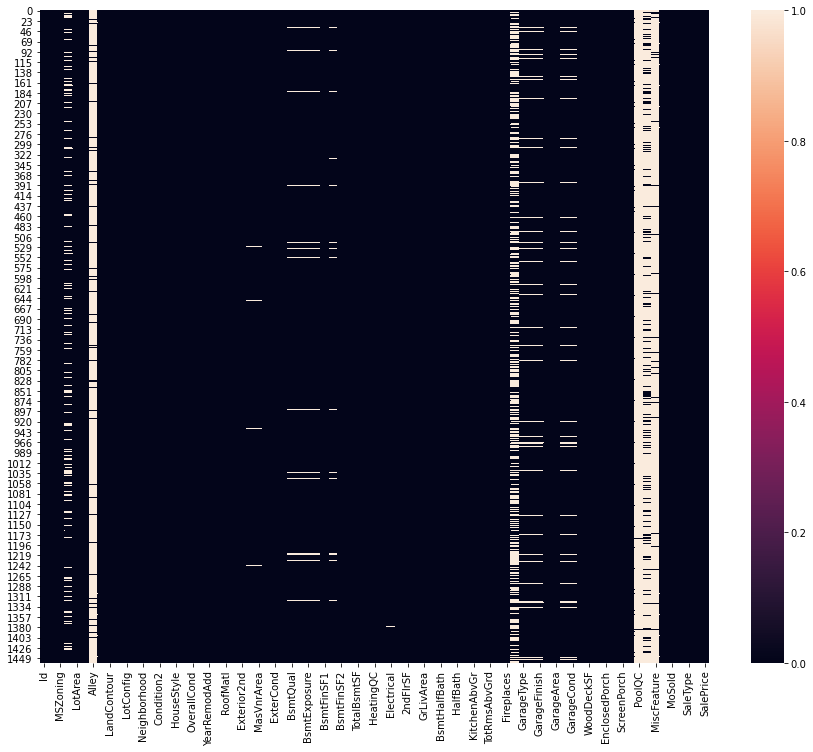

,count,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [8]:
null_check(df, heatmap=True)

1. There seems to be a pattern in the missing values.
    - All the _`Garage-`_ columns seem to have missing values in the same rows based on the heatmap.
    - Similar pattern for _`Bsmt-`_ columns can be observed (except 1 row).
    - _`MasVnr-`_ columns show same pattern but for very low amount of data.
2. We will drop the columns with `> 40%` missing values.
3. Rest of the imputations will be decided based on the univariate analysis.

## Exploratory Data Analysis

### Initial Data Cleaning

In [9]:
#Dropping columns with > 40% missing values
df.drop(null_check(df)[null_check(df)['percent']>40].index, axis=1, inplace=True)
df.shape

(1460, 76)

In [10]:
#Dropping columns with extremely skewed categories
skewed_cats = ['Street', 'Utilities', 'Condition2', 'LandSlope', 'LandContour', 'RoofMatl', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal', 'Electrical', 'CentralAir', 'Functional', 'GarageCond', 'GarageQual', 'PavedDrive', 'SaleType']
df.drop(skewed_cats, axis=1, inplace=True)
df.shape

(1460, 56)

### Univariate Analysis

In [11]:
#Function for categorical columns
def uni_cat(col, df, rot=0):
    #Value counts of categories 
    print(f'Counts of {col}')
    print('-'*25)
    print(pd.DataFrame({'#':df[col].value_counts(dropna=False), '%':round(df[col].value_counts(normalize=True, dropna=False)*100,2)}))
    
    #Countplots
    plt.figure(figsize=(15,4))
    sns.countplot(df[col])
    plt.title(f'Counts in {col}')
    plt.xticks(rotation=rot)
    plt.show()

#Function for numerical columns
def uni_num(col, df, new_percentiles=[]):
    #Null values
    if df[col].isnull().sum()>0:
        print(f'Null values in {col}: {df[col].isnull().sum()}')
    
    #Description of column
    print(f'Desription of {col}')
    print('-'*25)
    percentiles=[0.1,0.25,0.5,0.75,0.9]
    percentiles.extend(new_percentiles)
    print(df[col].describe(percentiles=percentiles))
    
    #Subplots
    fig,axes=plt.subplots(1,2, figsize=(15,4))
    
    #Distribution plot
    sns.distplot(df[col], ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    
    #Boxplot
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    plt.show()

#### `MSSubClass`

Counts of MSSubClass
-------------------------
       #      %
20   536  36.71
60   299  20.48
50   144   9.86
120   87   5.96
30    69   4.73
160   63   4.32
70    60   4.11
80    58   3.97
90    52   3.56
190   30   2.05
85    20   1.37
75    16   1.10
45    12   0.82
180   10   0.68
40     4   0.27


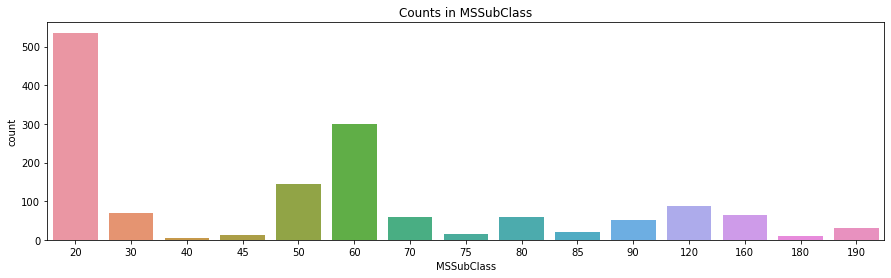

In [12]:
uni_cat('MSSubClass', df)

This categorical columns has too many categories, upon inspection in the data dictionary,

As per the data dictionary:
- __1 floor__: 20, 30, 40, 120
- __1.5 floor__: 45, 50, 150
- __2 floor__: 60, 70, 90, 160, 190
- __2.5 floor__: 75
- __Others__: 80, 85, 180

We have almost similar information in `HouseStyle` column. Hence, there's a good chance that these columns might be highly collinear. We will have to check for multicollinearity and decide which column to drop among these.

#### `MSZoning`

Counts of MSZoning
-------------------------
            #      %
RL       1151  78.84
RM        218  14.93
FV         65   4.45
RH         16   1.10
C (all)    10   0.68


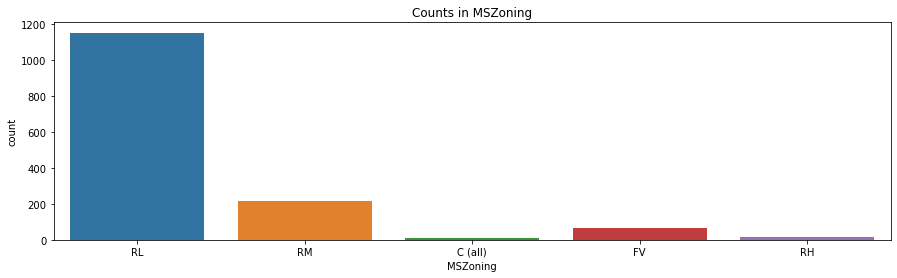

In [13]:
uni_cat('MSZoning',df)

__Observations:__
- Most of the data is from __low density residential__ and the least observations are of __commercial__.

#### `LotFrontage`

Null values in LotFrontage: 259
Desription of LotFrontage
-------------------------
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
96%       110.000000
97%       120.000000
99%       141.000000
99.5%     160.000000
max       313.000000
Name: LotFrontage, dtype: float64


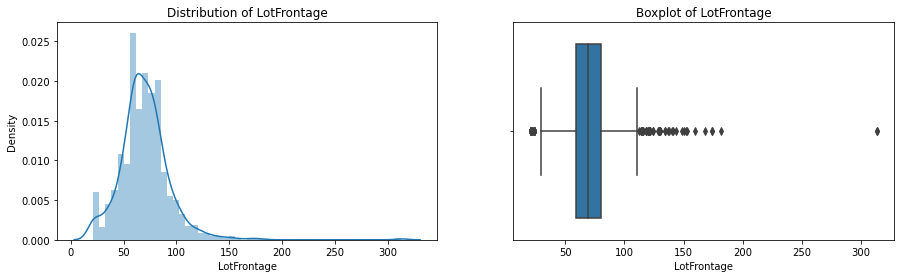

In [14]:
uni_num('LotFrontage', df, new_percentiles=[0.95,0.96,0.97,0.99,0.995])

__Observations:__
1. This category has some missing values. Based on the amount of outliers, ___median___ imputation would be the most suitable here.
2. We will drop/cap the outlier values in this case (based on the number of rows).

In [15]:
#Number of rows with outlier values
df['LotFrontage'][(df['LotFrontage']>=df['LotFrontage'].quantile(0.96))|(df['LotFrontage']<=df['LotFrontage'].quantile(0.05))].shape[0]

117

- Since there are too many rows, we will cap the outliers between 96th and 100th percentile with 96th percentile value.
- Values between 0th and 0.5th percentile will be capped with the value at 0.5th percentile value.

In [16]:
#Capping the values between 96th and 100th percentile
df['LotFrontage'][(df['LotFrontage']>=df['LotFrontage'].quantile(0.96))] = df['LotFrontage'].quantile(0.96)

#Capping the values below 0.5th percentile
df['LotFrontage'][(df['LotFrontage']<df['LotFrontage'].quantile(0.05))] = df['LotFrontage'].quantile(0.05)

Null values in LotFrontage: 259
Desription of LotFrontage
-------------------------
count    1201.000000
mean       69.333056
std        19.028636
min        34.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
max       110.000000
Name: LotFrontage, dtype: float64


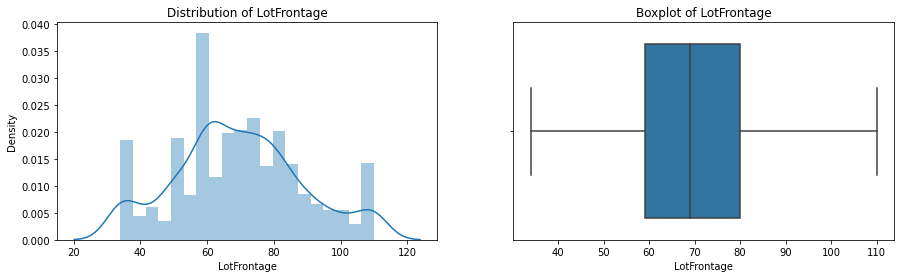

In [17]:
#Confirming above changes
uni_num('LotFrontage', df)

In [18]:
#Checking missing values
df['LotFrontage'].isnull().sum()

259

In [19]:
#Imputing with median values
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['LotFrontage'].isnull().sum()

0

The plot of `LotFrontage` is now almost _Normal_ and all the missing values are now treated.

#### `LotArea`

Desription of LotArea
-------------------------
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
10%        5000.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
95.5%     17795.020000
97%       21571.800000
99%       37567.640000
99.5%     53422.285000
max      215245.000000
Name: LotArea, dtype: float64


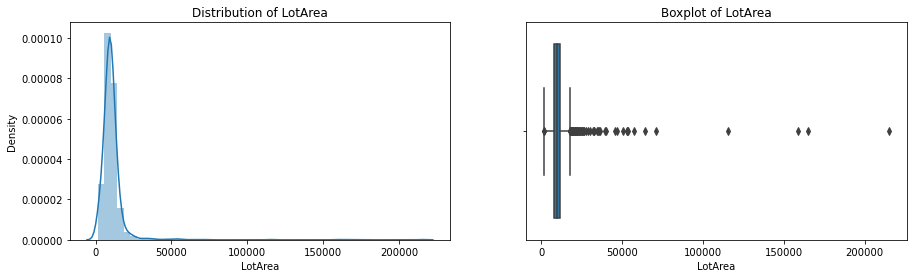

In [20]:
uni_num('LotArea',df, new_percentiles=[0.95,0.955,0.97,0.99,0.995])

__Observations:__
1. There seem to be quite a few outliers, we will cap the values more than 95.5th percentile

In [21]:
#Capping the top 5 percentile rows with 95.5th percentile values
df['LotArea'][df['LotArea']>=df['LotArea'].quantile(0.955)] = df['LotArea'].quantile(0.955)

Desription of LotArea
-------------------------
count     1460.000000
mean      9652.809808
std       3607.115695
min       1300.000000
10%       5000.000000
25%       7553.500000
50%       9478.500000
75%      11601.500000
90%      14381.700000
max      17795.020000
Name: LotArea, dtype: float64


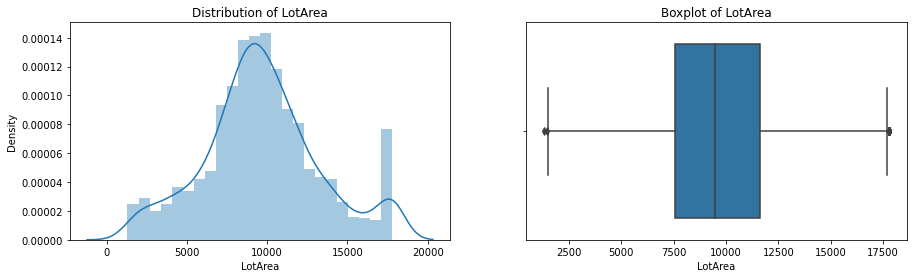

In [22]:
uni_num('LotArea',df)

__Observations:__
1. There are outliers that can still be spotted. Although very close to the whiskers.
2. Although, the dataset is now in a almost normal graph, we can see a slight rise in the capped values at the higher end.

#### `LotShape`

Counts of LotShape
-------------------------
       #      %
Reg  925  63.36
IR1  484  33.15
IR2   41   2.81
IR3   10   0.68


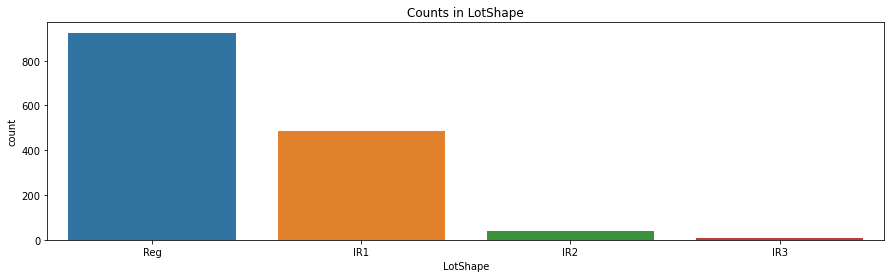

In [23]:
uni_cat('LotShape',df)

__Observations:__
1. `IR1, IR2, IR3` all mean irregularities in the shape of the lot. 
2. Since the number of observations is low for some, we will combine all the _IRs_ into `IR`

In [24]:
#Applying above change
df['LotShape'] = df['LotShape'].apply(lambda x: 'IR' if x in ('IR1','IR2','IR3') else x)

Counts of LotShape
-------------------------
       #      %
Reg  925  63.36
IR   535  36.64


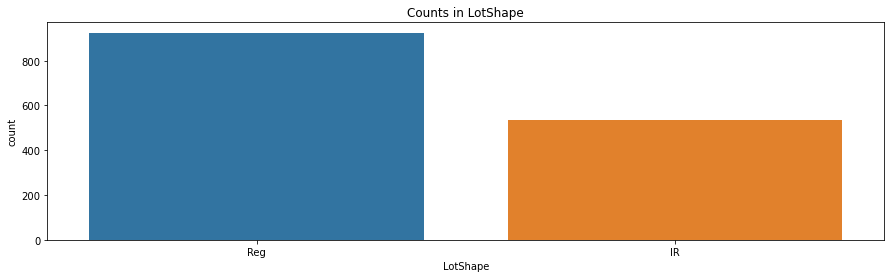

In [25]:
uni_cat('LotShape',df)

#### `LotConfig`

Counts of LotConfig
-------------------------
            #      %
Inside   1052  72.05
Corner    263  18.01
CulDSac    94   6.44
FR2        47   3.22
FR3         4   0.27


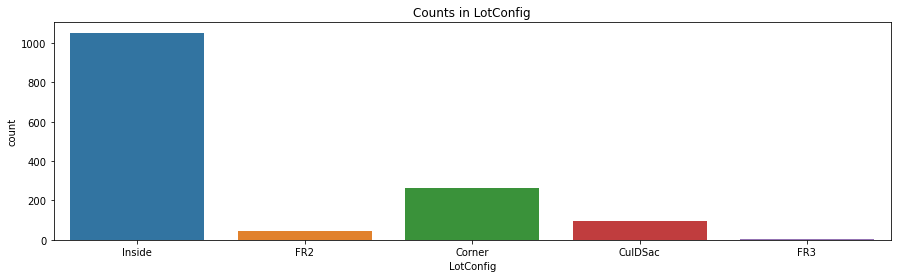

In [26]:
uni_cat('LotConfig',df)

__Observations:__
1. Due to low number of observations in both _Frontage_ configs, we will combine `FR2, FR3` as `FR`

In [27]:
#Applying above changes
df['LotConfig'] = df['LotConfig'].apply(lambda x: 'FR' if x in ('FR2','FR3') else x)

Counts of LotConfig
-------------------------
            #      %
Inside   1052  72.05
Corner    263  18.01
CulDSac    94   6.44
FR         51   3.49


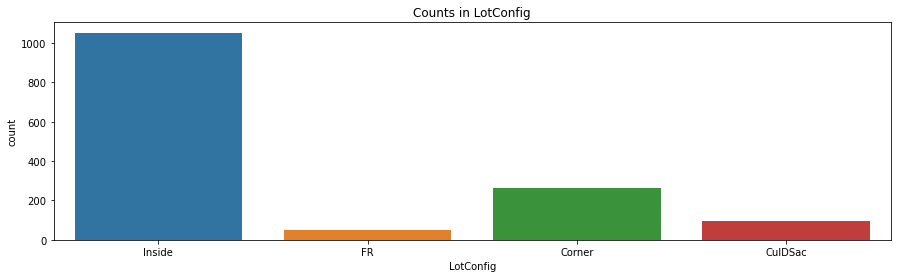

In [28]:
uni_cat('LotConfig', df)

#### `Neighborhood`

Counts of Neighborhood
-------------------------
           #      %
NAmes    225  15.41
CollgCr  150  10.27
OldTown  113   7.74
Edwards  100   6.85
Somerst   86   5.89
Gilbert   79   5.41
NridgHt   77   5.27
Sawyer    74   5.07
NWAmes    73   5.00
SawyerW   59   4.04
BrkSide   58   3.97
Crawfor   51   3.49
Mitchel   49   3.36
NoRidge   41   2.81
Timber    38   2.60
IDOTRR    37   2.53
ClearCr   28   1.92
SWISU     25   1.71
StoneBr   25   1.71
MeadowV   17   1.16
Blmngtn   17   1.16
BrDale    16   1.10
Veenker   11   0.75
NPkVill    9   0.62
Blueste    2   0.14


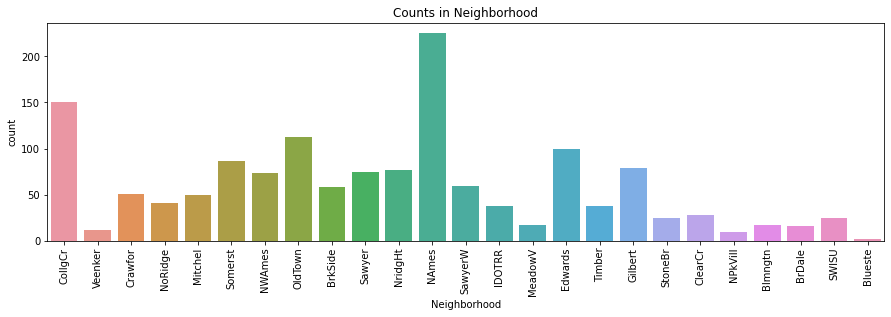

In [29]:
uni_cat('Neighborhood', df, rot=90)

__Observations:__
1. There are too many categories, categories with `< 3.5%` observations will be clubbed as __Others__.

In [30]:
#Applying above changes
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 'Others' if x in ['Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr',
       'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker',
       'NPkVill', 'Blueste'] else x)

Counts of Neighborhood
-------------------------
           #      %
Others   366  25.07
NAmes    225  15.41
CollgCr  150  10.27
OldTown  113   7.74
Edwards  100   6.85
Somerst   86   5.89
Gilbert   79   5.41
NridgHt   77   5.27
Sawyer    74   5.07
NWAmes    73   5.00
SawyerW   59   4.04
BrkSide   58   3.97


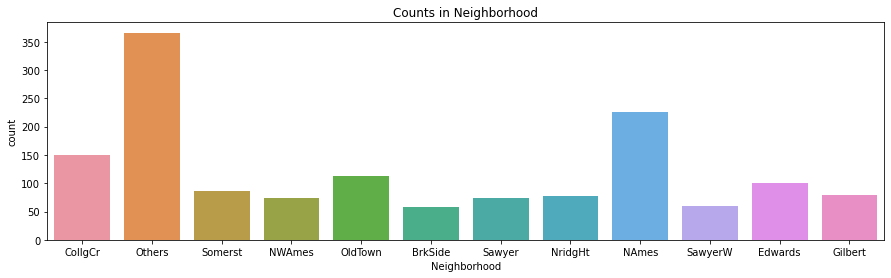

In [31]:
uni_cat('Neighborhood',df)

#### `Condition1`

Counts of Condition1
-------------------------
           #      %
Norm    1260  86.30
Feedr     81   5.55
Artery    48   3.29
RRAn      26   1.78
PosN      19   1.30
RRAe      11   0.75
PosA       8   0.55
RRNn       5   0.34
RRNe       2   0.14


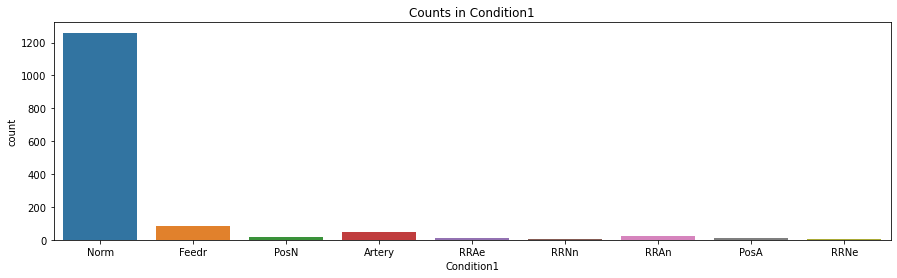

In [32]:
uni_cat('Condition1',df)

This columns seems to be too skewed. We will __drop__ this.

In [33]:
#Dropping the columns
df.drop('Condition1',axis=1,inplace=True)

df.shape

(1460, 55)

#### `BldgType`

Counts of BldgType
-------------------------
           #      %
1Fam    1220  83.56
TwnhsE   114   7.81
Duplex    52   3.56
Twnhs     43   2.95
2fmCon    31   2.12


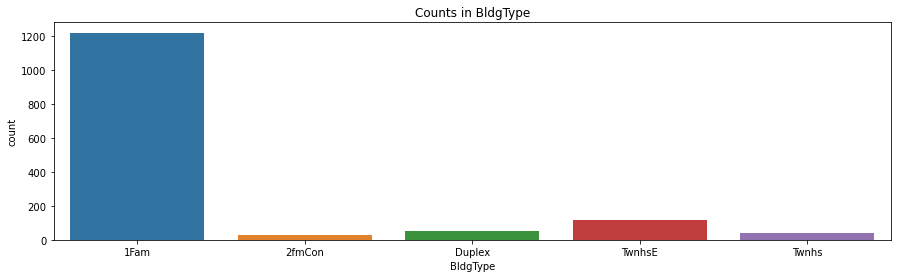

In [34]:
uni_cat('BldgType', df)

__Observations:__
1. Combining both _TownHouse_ categories will reduce the number of cataegories while giving closely similar information.
2. `TwnhsE` will be changed to `Twnhs`

In [35]:
#Applying above changes
df['BldgType'] = df['BldgType'].apply(lambda x: 'Twnhs' if x=='TwnhsE' else x)

Counts of BldgType
-------------------------
           #      %
1Fam    1220  83.56
Twnhs    157  10.75
Duplex    52   3.56
2fmCon    31   2.12


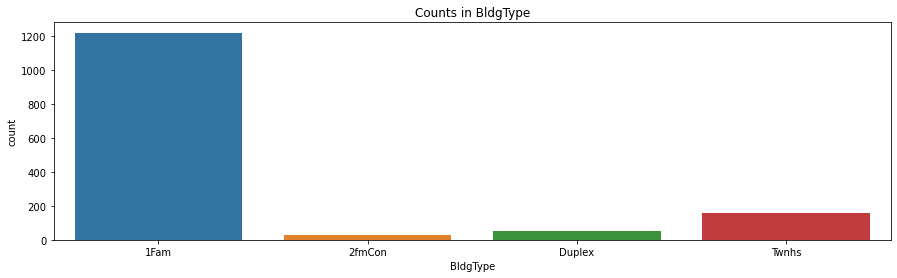

In [36]:
uni_cat('BldgType', df)

The column is still skewed, but we will consider it for now and check for it's importance later on.

#### `HouseStyle`

Counts of HouseStyle
-------------------------
          #      %
1Story  726  49.73
2Story  445  30.48
1.5Fin  154  10.55
SLvl     65   4.45
SFoyer   37   2.53
1.5Unf   14   0.96
2.5Unf   11   0.75
2.5Fin    8   0.55


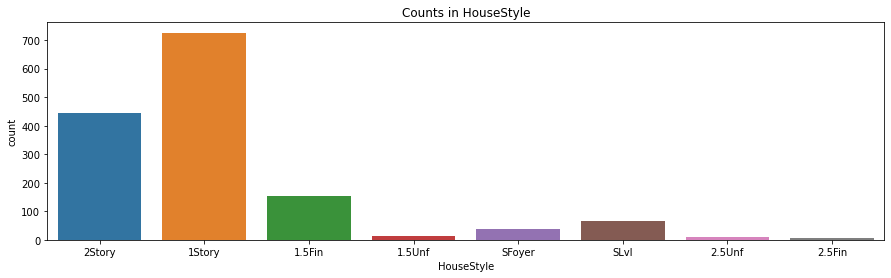

In [37]:
uni_cat('HouseStyle', df)

__Observations:__
1. The observations to determine `Fin` or `Unf` are too low in number. Hence, combining them would result in lesser overfitting.
2. `1.5Story` and `2.5Story` will be created after clubbing based on the above point.
3. `S-` stories will be converted to `SplitFloor`

In [38]:
#Function to combine
def housestyle_mod(x):
    if x in ('1.5Unf','1.5Fin'):
        return '1.5Story'
    elif x in ('2.5Unf','2.5Fin'):
        return '2.5Story'
    elif x in ('SFoyer','SLvl'):
        return 'SplitFloor'
    else:
        return x

#Applying above changes
df['HouseStyle'] = df['HouseStyle'].apply(housestyle_mod)

Counts of HouseStyle
-------------------------
              #      %
1Story      726  49.73
2Story      445  30.48
1.5Story    168  11.51
SplitFloor  102   6.99
2.5Story     19   1.30


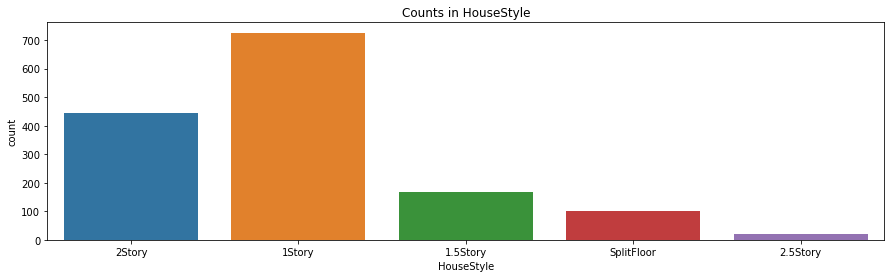

In [39]:
uni_cat('HouseStyle', df)

#### `OverallQual`

Counts of OverallQual
-------------------------
      #      %
5   397  27.19
6   374  25.62
7   319  21.85
8   168  11.51
4   116   7.95
9    43   2.95
3    20   1.37
10   18   1.23
2     3   0.21
1     2   0.14


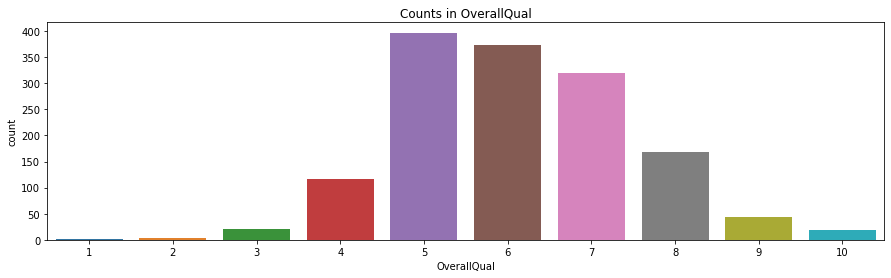

In [40]:
uni_cat('OverallQual', df)

__Observations:__
1. Houses with `< 4` and `> 7` have lesser observations.
2. `5`,`6`,`7` have very high observations.

#### `OverallCond`

Counts of OverallCond
-------------------------
     #      %
5  821  56.23
6  252  17.26
7  205  14.04
8   72   4.93
4   57   3.90
3   25   1.71
9   22   1.51
2    5   0.34
1    1   0.07


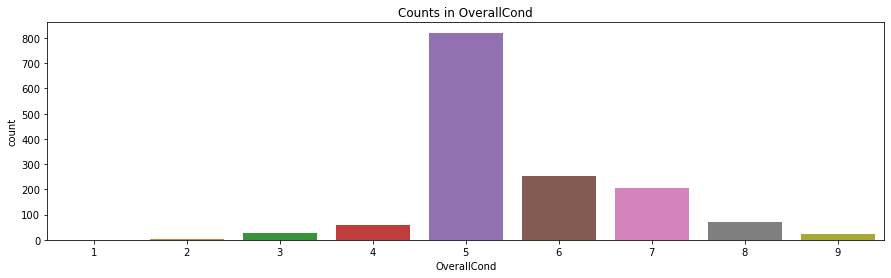

In [41]:
uni_cat('OverallCond', df)

__Observations:__
1. Most of the houses are _average_ in quality, i.e. `5` rated overall condition.

#### `YearBuilt` & `YearRemodAdd`

Desription of YearBuilt
-------------------------
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
10%      1924.900000
25%      1954.000000
50%      1973.000000
75%      2000.000000
90%      2006.000000
max      2010.000000
Name: YearBuilt, dtype: float64


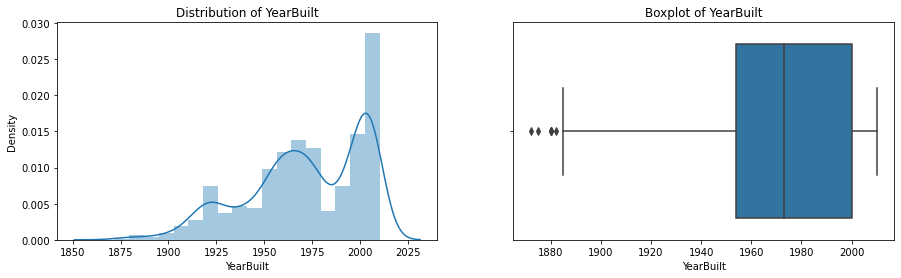

In [42]:
uni_num('YearBuilt', df)

__Observations:__
1. We have some very vintage houses built before `1900` year.
2. Most of the houses seem to have been built between `1960-2000`
3. The outliers are pretty justified and no treatment will be required.
4. This column will be used to extract _Age_ in a new variable `HouseAge` and then dropped for more relevant meaning.


__`HouseAge = 2021 - YearBuilt`__

Desription of YearRemodAdd
-------------------------
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
10%      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
90%      2006.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


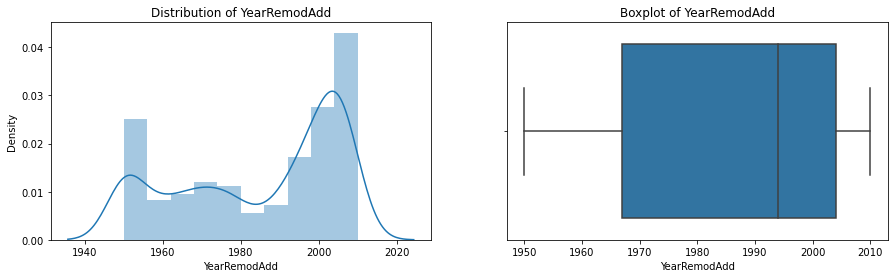

In [43]:
uni_num('YearRemodAdd',df)

__Observations:__
1. House _built_ before `1950` were all modified based on the above info.
2. We can create a new column with `YearRemodAdd` and `YearBuilt` to check if any modifications are done.<br><br>
__`ModdedYears = YearRemodAdd - YearBuilt + 11`__ _(adding 11 since the dataset is of 2010 and we want the age based on 2021)_<br><br>
3.  We will call it `ModdedYears` which will be `0` if no mod was done, else `no. of years before mod`.
4. We will drop `YearRemodAdd` after creating the new feature.

The above actions will help us avoid multicollinearity, while retaining the information.

In [44]:
#Creating the new feature
df['ModdedYears'] = (df['YearRemodAdd'] - df['YearBuilt'])+11

#Dropping 'YearRemodAdd'
df.drop('YearRemodAdd', axis=1, inplace=True)

df.shape

(1460, 55)

In [45]:
#Creating age column
df['HouseAge'] = 2021 - df['YearBuilt']

#Dropping 'YearBuilt'
df.drop('YearBuilt', axis=1, inplace=True)

df.shape

(1460, 55)

#### `RoofStyle`

Counts of RoofStyle
-------------------------
            #      %
Gable    1141  78.15
Hip       286  19.59
Flat       13   0.89
Gambrel    11   0.75
Mansard     7   0.48
Shed        2   0.14


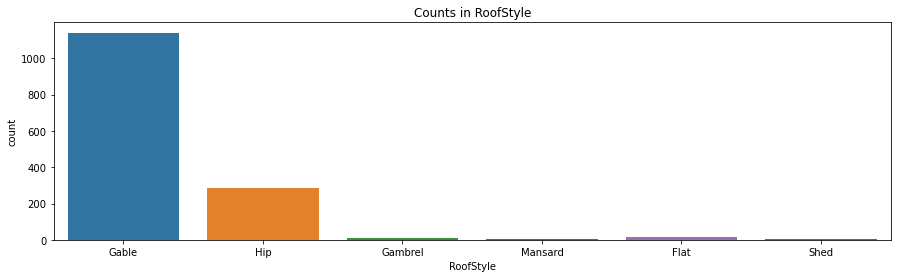

In [46]:
uni_cat('RoofStyle', df)

__Observations:__
1. Due to low number of features, it would be better to combine all the categories __except__ `Gable` and `Hip`

In [47]:
#Applying above changes
df['RoofStyle'] = df['RoofStyle'].apply(lambda x: 'Others' if x not in ('Gable','Hip') else x)

Counts of RoofStyle
-------------------------
           #      %
Gable   1141  78.15
Hip      286  19.59
Others    33   2.26


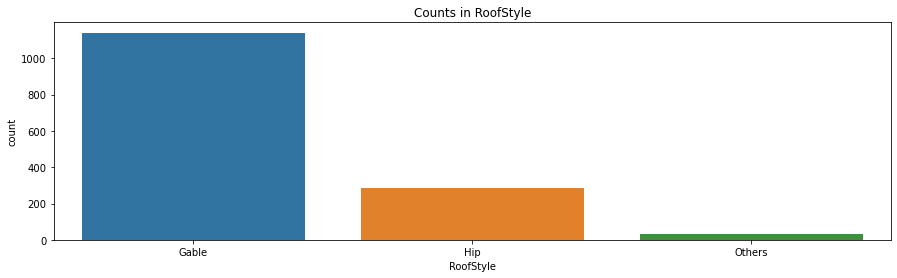

In [48]:
uni_cat('RoofStyle', df)

#### `Exterior1st`

Counts of Exterior1st
-------------------------
           #      %
VinylSd  515  35.27
HdBoard  222  15.21
MetalSd  220  15.07
Wd Sdng  206  14.11
Plywood  108   7.40
CemntBd   61   4.18
BrkFace   50   3.42
WdShing   26   1.78
Stucco    25   1.71
AsbShng   20   1.37
BrkComm    2   0.14
Stone      2   0.14
AsphShn    1   0.07
CBlock     1   0.07
ImStucc    1   0.07


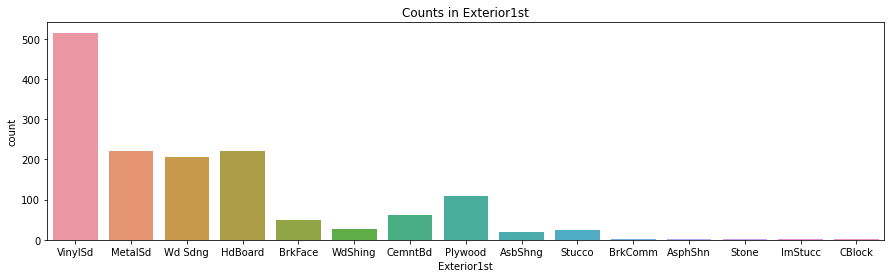

In [49]:
uni_cat('Exterior1st',df)

__Observations:__
1. Many categories have low number of observations.
2. We will combine all categories with `< 4%` data into `Others`

In [50]:
#Applying above changes
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'Others' if x in ['BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 'CBlock',
       'ImStucc', 'AsphShn'] else x)

Counts of Exterior1st
-------------------------
           #      %
VinylSd  515  35.27
HdBoard  222  15.21
MetalSd  220  15.07
Wd Sdng  206  14.11
Others   128   8.77
Plywood  108   7.40
CemntBd   61   4.18


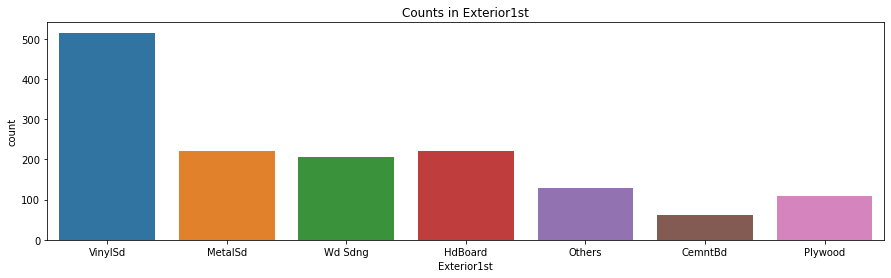

In [51]:
uni_cat('Exterior1st',df)

#### `Exterior2nd`

Counts of Exterior2nd
-------------------------
           #      %
VinylSd  504  34.52
MetalSd  214  14.66
HdBoard  207  14.18
Wd Sdng  197  13.49
Plywood  142   9.73
CmentBd   60   4.11
Wd Shng   38   2.60
Stucco    26   1.78
BrkFace   25   1.71
AsbShng   20   1.37
ImStucc   10   0.68
Brk Cmn    7   0.48
Stone      5   0.34
AsphShn    3   0.21
CBlock     1   0.07
Other      1   0.07


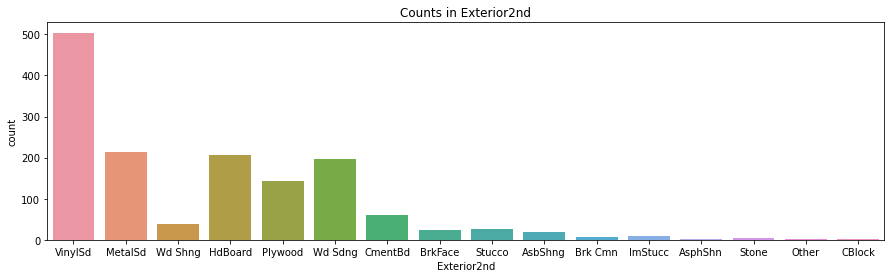

In [52]:
uni_cat('Exterior2nd',df)

__Observations:__
1. Many categories have low number of observations.
2. We will combine all categories with `< 4%` data into `Others`

In [53]:
#Applying above changes
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'Others' if x in ['Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn',
       'Stone', 'AsphShn', 'CBlock', 'Other'] else x)

Counts of Exterior2nd
-------------------------
           #      %
VinylSd  504  34.52
MetalSd  214  14.66
HdBoard  207  14.18
Wd Sdng  197  13.49
Plywood  142   9.73
Others   136   9.32
CmentBd   60   4.11


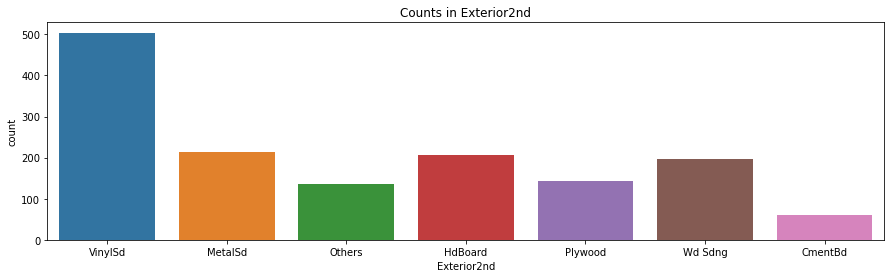

In [54]:
uni_cat('Exterior2nd',df)

#### `MasVnrType` & `MasVnrArea`

Counts of MasVnrType
-------------------------
           #      %
None     864  59.18
BrkFace  445  30.48
Stone    128   8.77
BrkCmn    15   1.03
NaN        8   0.55


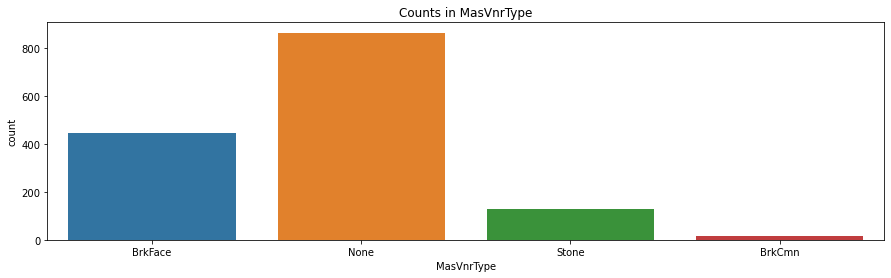

In [55]:
uni_cat('MasVnrType', df)

Null values in MasVnrArea: 8
Desription of MasVnrArea
-------------------------
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


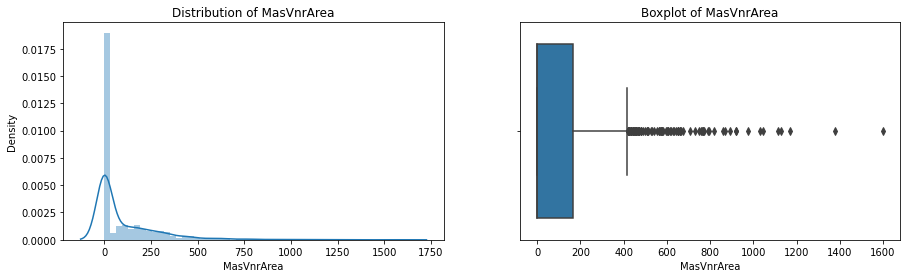

In [56]:
uni_num('MasVnrArea', df)

In [57]:
#Checking the sanity of area in 'None' type
df['MasVnrArea'][df['MasVnrType']=='None'].describe(percentiles=[0.95,0.97,0.99,0.995])

count    864.000000
mean       1.094907
std       18.569659
min        0.000000
50%        0.000000
95%        0.000000
97%        0.000000
99%        0.000000
99.5%      0.685000
max      344.000000
Name: MasVnrArea, dtype: float64

__Observations:__
1. There are _8 missing values_ in the `MasVnr-` columns together.
2. For `MasVnrType`, we will impute the missing values with __None__.
3. For `MasVnrArea`, based on the above _imputation of `MasVnrArea`_, we will impute with __0__
3. Some rows we have __> 0__ as _area_ where the type is __None__, these will be corrected and marked as __0__

In [58]:
#Imputing missing values
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

#Correcting teh 'area' values
df['MasVnrArea'][df['MasVnrType']=='None'] = 0

Desription of MasVnrArea
-------------------------
count    1460.000000
mean      102.469178
std       180.533794
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       162.250000
90%       333.200000
95%       456.000000
97%       573.690000
99%       791.280000
99.5%     959.365000
max      1600.000000
Name: MasVnrArea, dtype: float64


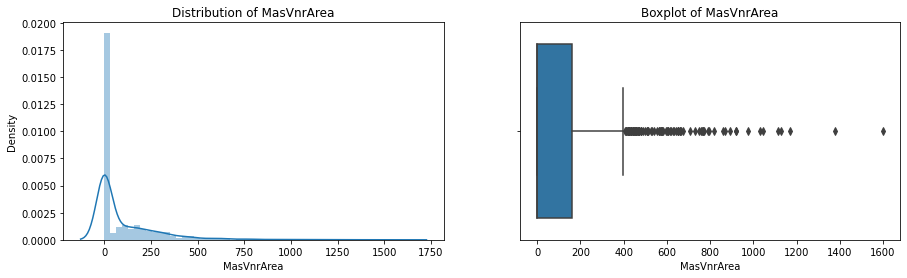

In [59]:
uni_num('MasVnrArea', df, new_percentiles=[0.95,0.97,0.99,0.995])

We need to apply a transformation here to correct the outliers.

<AxesSubplot:>

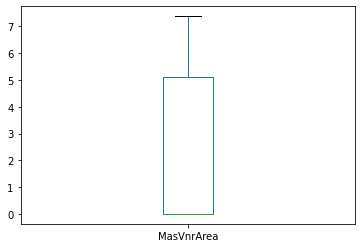

In [60]:
#Checking log transformation
np.log(df['MasVnrArea']+1).plot(kind='box')

Since _log_ transformation works well, we will go ahead with it.

In [61]:
#Applying log transformation
df['MasVnrArea'] = np.log(df['MasVnrArea']+1)

#### `ExterQual`

Counts of ExterQual
-------------------------
      #      %
TA  906  62.05
Gd  488  33.42
Ex   52   3.56
Fa   14   0.96


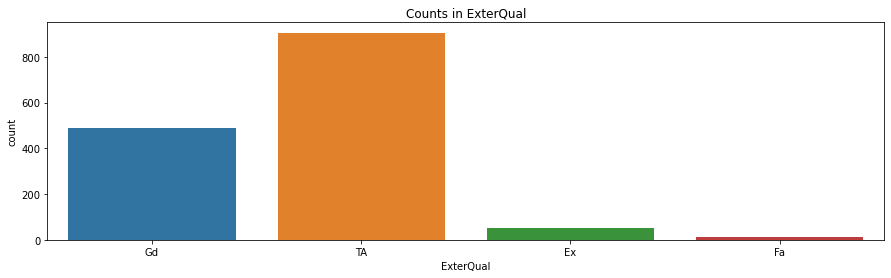

In [62]:
uni_cat('ExterQual', df)

__Observations:__
1. We have highest ratings in the `Average/Typical` category followed by `Good`.
2. No observations found in `Po` category (as mentioned in data dictionary)
3. The values in this category follow an order, changing them to a scale of 1-5 based on the data dictionary will be more appropriate.


In [63]:
#Applying above changes
df['ExterQual'] = df['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

Counts of ExterQual
-------------------------
     #      %
3  906  62.05
4  488  33.42
5   52   3.56
2   14   0.96


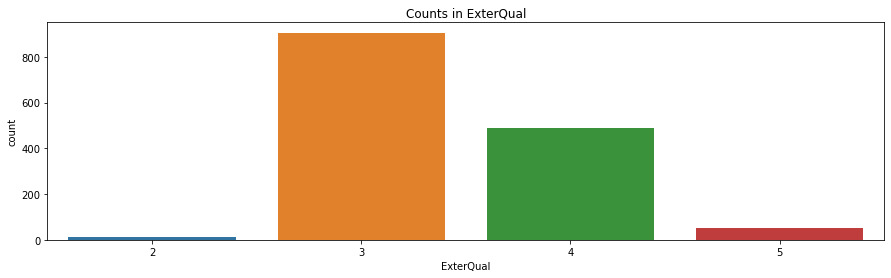

In [64]:
uni_cat('ExterQual',df)

#### `ExterCond`

Counts of ExterCond
-------------------------
       #      %
TA  1282  87.81
Gd   146  10.00
Fa    28   1.92
Ex     3   0.21
Po     1   0.07


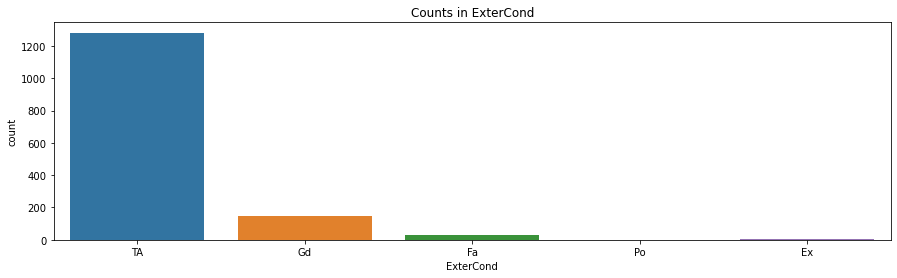

In [65]:
uni_cat('ExterCond',df)

__Observations:__
1. We have highest ratings in the `Average/Typical`, almost skewed towards this category.
2. The values in this category follow an order, changing them to a scale of 1-5 based on the data dictionary will be more appropriate, __BUT__ Since the categories are extremely skewed, we will drop this column.

In [66]:
#Dropping the column
df.drop('ExterCond', axis=1, inplace=True)

df.shape

(1460, 54)

#### `Foundation`

Counts of Foundation
-------------------------
          #      %
PConc   647  44.32
CBlock  634  43.42
BrkTil  146  10.00
Slab     24   1.64
Stone     6   0.41
Wood      3   0.21


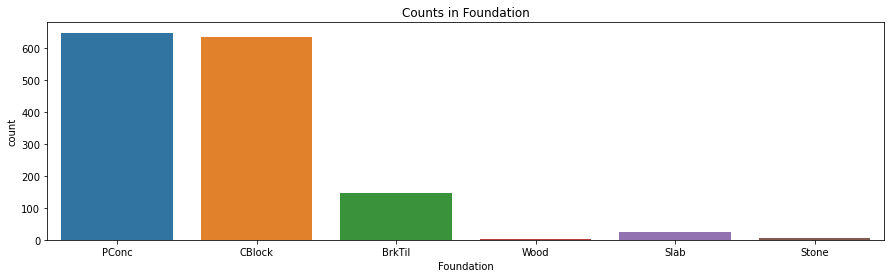

In [67]:
uni_cat('Foundation', df)

__Observations:__
1. Due to low number of observations, we will combine `Wood, Stone, Slab` as `Others`

In [68]:
#Applying above changes
df['Foundation'] = df['Foundation'].apply(lambda x: 'Others' if x in ('Wood','Stone','Slab') else x)

Counts of Foundation
-------------------------
          #      %
PConc   647  44.32
CBlock  634  43.42
BrkTil  146  10.00
Others   33   2.26


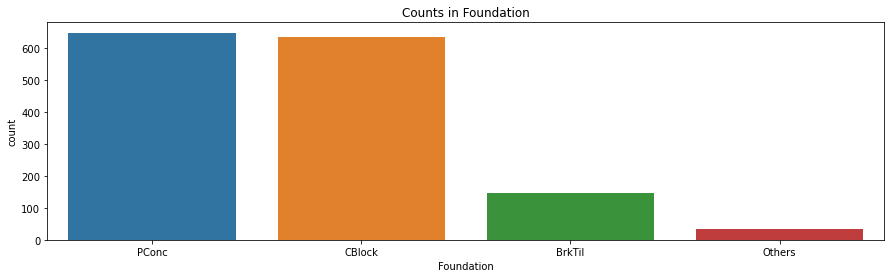

In [69]:
uni_cat('Foundation',df)

#### `Bsmt-` columns

Based on the previous analysis, we have `2.53%` _missing values_ in all of basement columns. These values will be assumed to have __no basement__ and respective imputations will be done.

Counts of BsmtQual
-------------------------
       #      %
TA   649  44.45
Gd   618  42.33
Ex   121   8.29
NaN   37   2.53
Fa    35   2.40


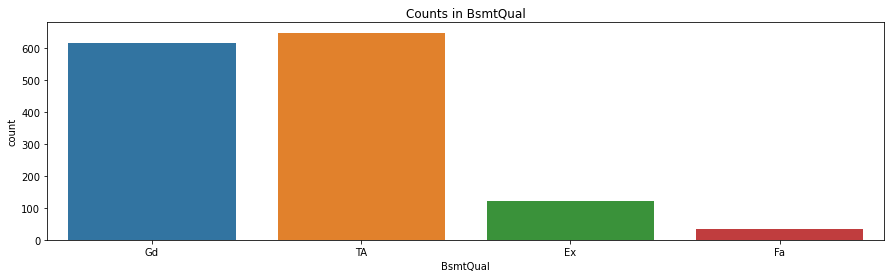

In [70]:
uni_cat('BsmtQual',df)

Counts of BsmtCond
-------------------------
        #      %
TA   1311  89.79
Gd     65   4.45
Fa     45   3.08
NaN    37   2.53
Po      2   0.14


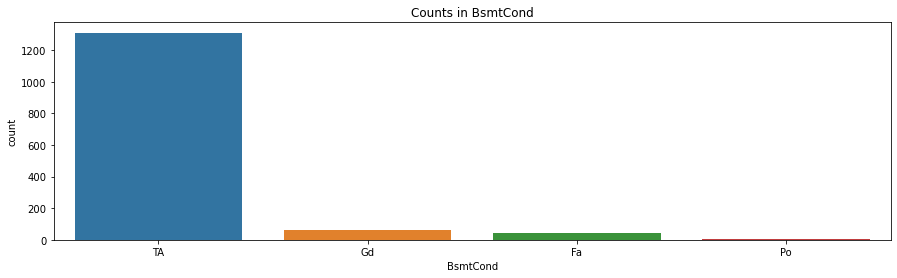

In [71]:
uni_cat('BsmtCond',df)

`BsmtCond` column is extremely skewed, thus, it will be dropped.

In [72]:
#Dropping the column
df.drop('BsmtCond', axis=1, inplace=True)

df.shape

(1460, 53)

Counts of BsmtExposure
-------------------------
       #      %
No   953  65.27
Av   221  15.14
Gd   134   9.18
Mn   114   7.81
NaN   38   2.60


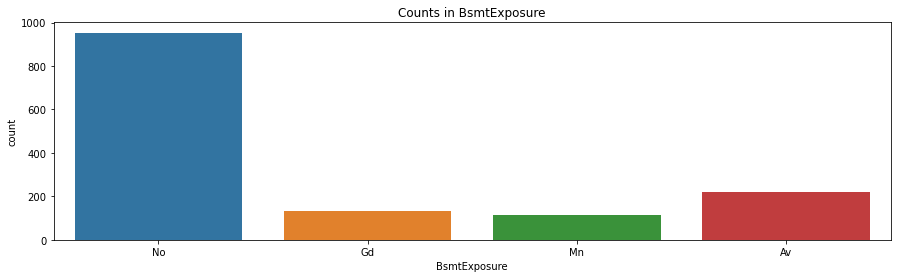

In [73]:
uni_cat('BsmtExposure', df)

Counts of BsmtFinType1
-------------------------
       #      %
Unf  430  29.45
GLQ  418  28.63
ALQ  220  15.07
BLQ  148  10.14
Rec  133   9.11
LwQ   74   5.07
NaN   37   2.53


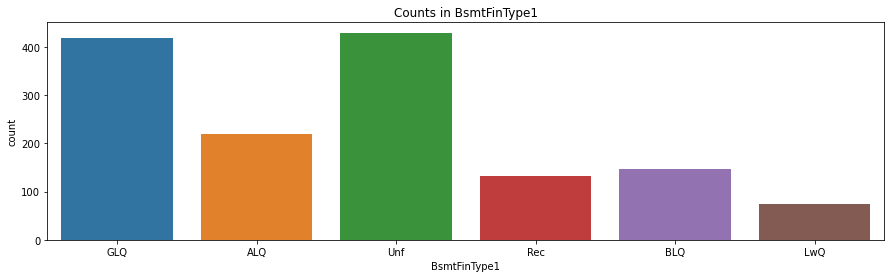

In [74]:
uni_cat('BsmtFinType1', df)

Desription of BsmtFinSF1
-------------------------
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
10%         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
97%      1375.990000
99%      1572.410000
99.5%    1753.430000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


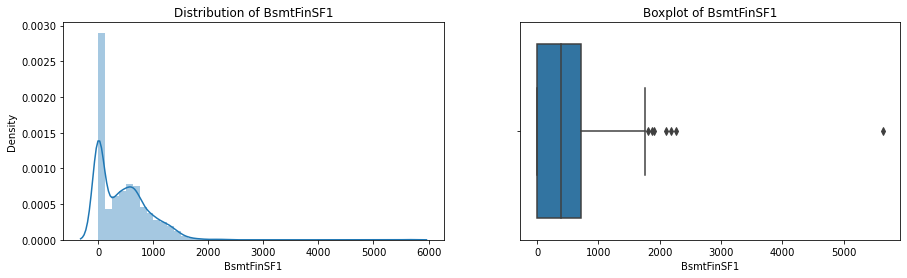

In [75]:
uni_num('BsmtFinSF1', df, new_percentiles=[0.95,0.97,0.99,0.995])

Transforming will be helpful here to get rid of outliers.

<AxesSubplot:>

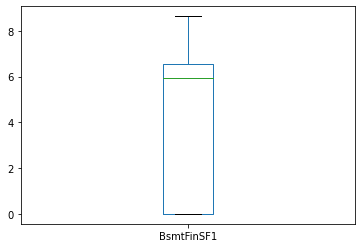

In [76]:
#Checking log transformation
np.log(df['BsmtFinSF1']+1).plot(kind='box')

From the above, all outliers seem to be treated. Thus, we will go ahead with _log_ transformation.

In [77]:
#Applying transformation
df['BsmtFinSF1'] = np.log(df['BsmtFinSF1']+1)

Counts of BsmtFinType2
-------------------------
        #      %
Unf  1256  86.03
Rec    54   3.70
LwQ    46   3.15
NaN    38   2.60
BLQ    33   2.26
ALQ    19   1.30
GLQ    14   0.96


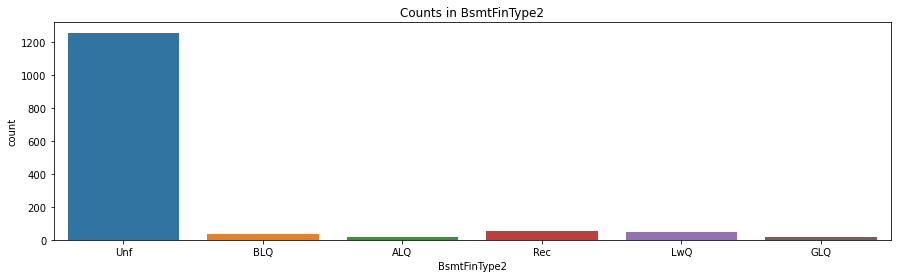

In [78]:
uni_cat('BsmtFinType2', df)

The categories are highly skewed. We will go ahead by dropping this column.

In [79]:
#Dropping the column
df.drop('BsmtFinType2', axis=1, inplace=True)

df.shape

(1460, 52)

Desription of BsmtUnfSF
-------------------------
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
10%        74.900000
25%       223.000000
50%       477.500000
75%       808.000000
90%      1232.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


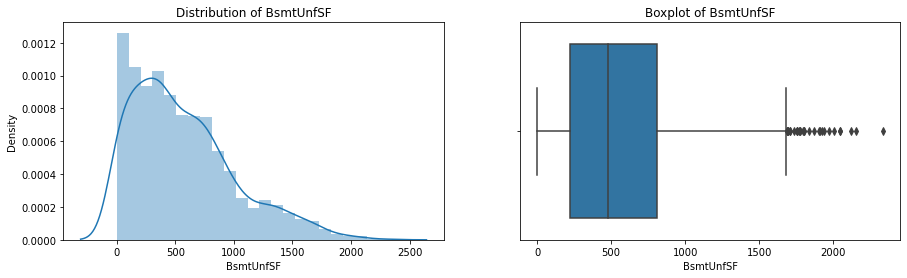

In [80]:
uni_num('BsmtUnfSF', df)

Transformation will be applied to treat outliers

<AxesSubplot:>

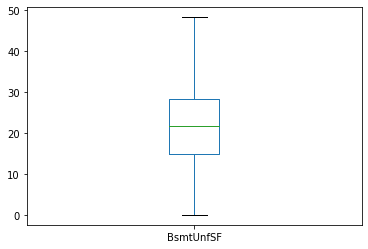

In [81]:
#Checking square root transformation
np.sqrt(df['BsmtUnfSF']).plot(kind='box')

Since this works well, we will go ahead with _square root_ transformation.

In [82]:
#Applying transformation
df['BsmtUnfSF'] = np.sqrt(df['BsmtUnfSF'])

Desription of TotalBsmtSF
-------------------------
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
10%       636.900000
25%       795.750000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
97%      1905.460000
99%      2155.050000
99.5%    2429.840000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


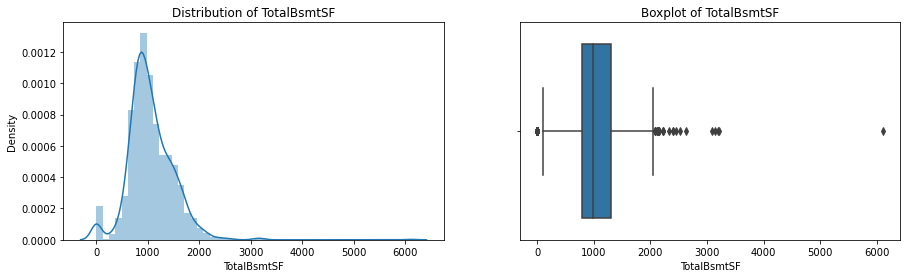

In [83]:
uni_num('TotalBsmtSF', df, new_percentiles=[0.95,0.97,0.99,0.995])

Outliers above 99th percentile will be dropped(if rows are less) or capped(if rows are too many).

In [84]:
#Checking number of rows in top 1 percentile
df.shape[0] - df['TotalBsmtSF'][df['TotalBsmtSF'] <= df['TotalBsmtSF'].quantile(0.99)].shape[0]

15

We will drop the outliers above 99th percentile since they are just 15 rows.

In [85]:
#Dropping the outliers
df = df[df['TotalBsmtSF'] <= df['TotalBsmtSF'].quantile(0.99)]

Now that `Bsmt-` columns are cleaned, respective imputations will be performed. 

With an assumption that the missing values are due to _No basements_, we will go ahead with the below imputations.

- `BsmtExposure` : __NA__
- `BsmtQual` : __NA__
- `BsmtFinType1` : __NA__

In [86]:
#Imputing missing values
df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtQual'].fillna('NA', inplace=True)
df['BsmtFinType1'].fillna('NA', inplace=True)

In [87]:
#Checking if values are miputed
null_check(df)

,count,percent
GarageType,81,5.61
GarageYrBlt,81,5.61
GarageFinish,81,5.61


In [88]:
#Label encoding 'BsmtQual'
def bsmt_qual_map(x):
    if x=='Ex':
        return 5
    elif x=='Gd':
        return 4
    elif x=='TA':
        return 3
    elif x=='Fa':
        return 2
    elif x=='Po':
        return 1
    elif x=='NA':
        return 0
    else:
        return x

    
#Applying the above function
df['BsmtQual'] = df['BsmtQual'].apply(bsmt_qual_map)

In [89]:
#Label encoding 'BsmtExposure'
def bsmt_exp_map(x):
    if x=='Gd':
        return 4
    elif x=='Av':
        return 3
    elif x=='Mn':
        return 2
    elif x=='No':
        return 1
    elif x=='NA':
        return 0
    else:
        return x

    
#Applying the above function
df['BsmtExposure'] = df['BsmtExposure'].apply(bsmt_exp_map)

In [90]:
#Label encoding 'BsmtFinType1'
def bsmt_fintype1_map(x):
    if x=='GLQ':
        return 6
    elif x=='ALQ':
        return 5
    elif x=='BLQ':
        return 4
    elif x=='Rec':
        return 3
    elif x=='LwQ':
        return 2
    elif x=='Unf':
        return 1
    elif x=='NA':
        return 0
    else:
        return x

    
#Applying the above function
df['BsmtFinType1'] = df['BsmtFinType1'].apply(bsmt_fintype1_map)

#### `HeatingQC`

Counts of HeatingQC
-------------------------
      #      %
Ex  728  50.38
TA  427  29.55
Gd  240  16.61
Fa   49   3.39
Po    1   0.07


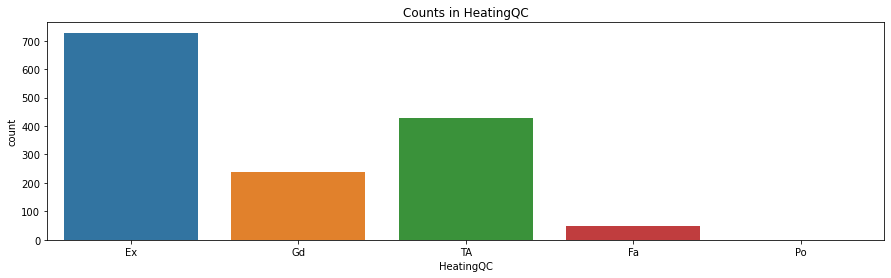

In [91]:
uni_cat('HeatingQC', df)

In [92]:
#Label encoding 'HeatingQC'
df['HeatingQC'] = df['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

#### `1stFlrSF`

Desription of 1stFlrSF
-------------------------
count    1445.000000
mean     1147.894810
std       353.782515
min       334.000000
10%       756.000000
25%       880.000000
50%      1080.000000
75%      1378.000000
90%      1659.600000
95%      1787.800000
97%      1894.800000
99%      2074.680000
99.5%    2127.240000
max      2898.000000
Name: 1stFlrSF, dtype: float64


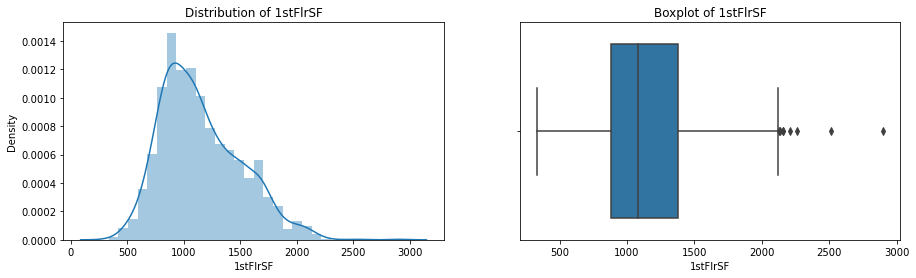

In [93]:
uni_num('1stFlrSF', df, new_percentiles=[0.95,0.97,0.99,0.995])

Seems like the top 1st percentile holds the outliers. These rows will be dropped.

Shape after dropping outliers: 1430


<AxesSubplot:>

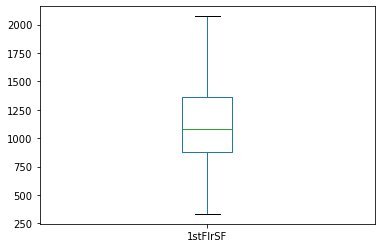

In [94]:
#Checking before dropping
print('Shape after dropping outliers:',df['1stFlrSF'][df['1stFlrSF']<=df['1stFlrSF'].quantile(0.99)].shape[0])
df['1stFlrSF'][df['1stFlrSF']<=df['1stFlrSF'].quantile(0.99)].plot(kind='box')

In [95]:
#Dropping the top 1 percentile values
df = df[df['1stFlrSF']<=df['1stFlrSF'].quantile(0.99)]

#### `2ndFlrSF`

Desription of 2ndFlrSF
-------------------------
count    1430.000000
mean      349.259441
std       432.892846
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       728.750000
90%       954.200000
max      1818.000000
Name: 2ndFlrSF, dtype: float64


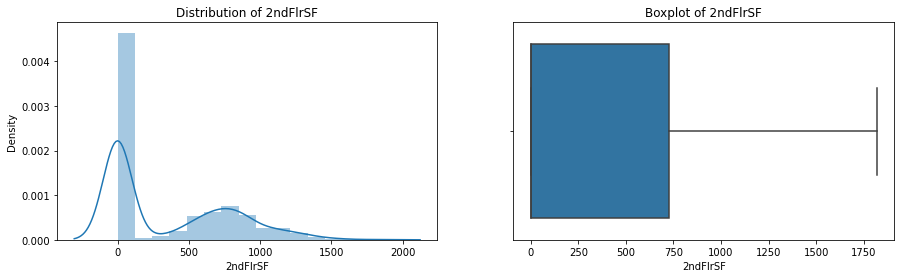

In [96]:
uni_num('2ndFlrSF', df)

While there seem to be not outliers, the distribution seems to be bimodal.

#### `GrLivArea`

Desription of GrLivArea
-------------------------
count    1430.000000
mean     1491.962238
std       487.489016
min       334.000000
10%       909.700000
25%      1125.000000
50%      1452.500000
75%      1750.000000
90%      2097.100000
95%      2415.650000
97%      2610.260000
99%      2923.830000
99.5%    3217.940000
max      3627.000000
Name: GrLivArea, dtype: float64


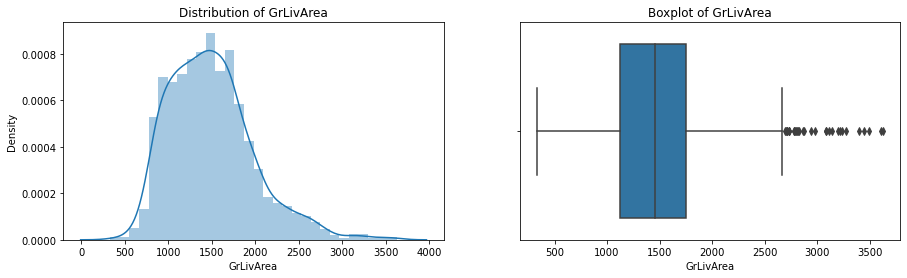

In [97]:
uni_num('GrLivArea', df, new_percentiles=[0.95,0.97,0.99,0.995])

We will cap the values at 97th percentile to treat the outliers.

In [98]:
#Capping the values
df['GrLivArea'][df['GrLivArea']>df['GrLivArea'].quantile(0.975)] = df['GrLivArea'].quantile(0.975)

Desription of GrLivArea
-------------------------
count    1430.000000
mean     1483.870210
std       462.941351
min       334.000000
10%       909.700000
25%      1125.000000
50%      1452.500000
75%      1750.000000
90%      2097.100000
max      2635.650000
Name: GrLivArea, dtype: float64


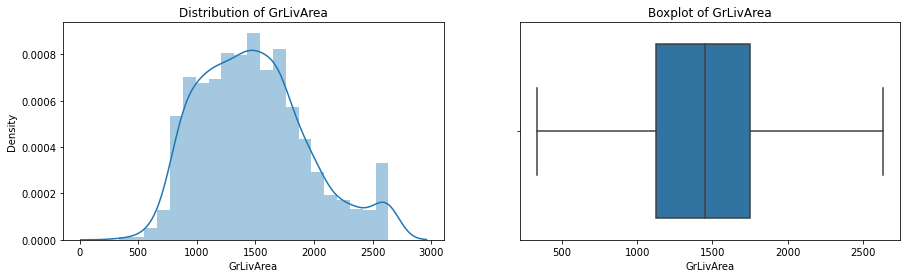

In [99]:
uni_num('GrLivArea', df)

#### `BsmtFullBath`

Counts of BsmtFullBath
-------------------------
     #      %
0  848  59.30
1  567  39.65
2   14   0.98
3    1   0.07


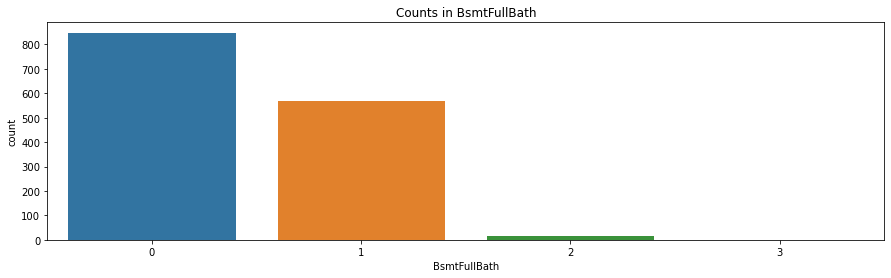

In [100]:
uni_cat('BsmtFullBath', df)

#### `FullBath`

Counts of FullBath
-------------------------
     #      %
2  744  52.03
1  649  45.38
3   28   1.96
0    9   0.63


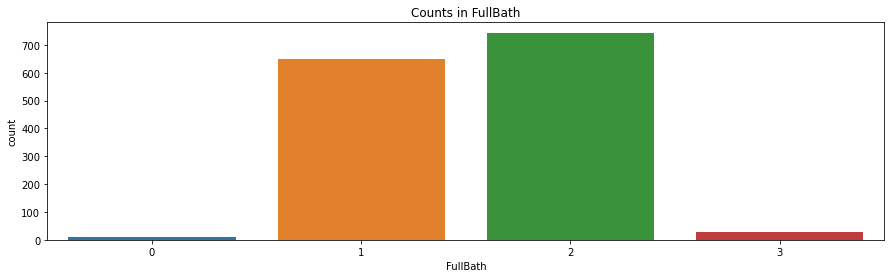

In [101]:
uni_cat('FullBath', df)

#### `HalfBath`

Counts of HalfBath
-------------------------
     #      %
0  897  62.73
1  521  36.43
2   12   0.84


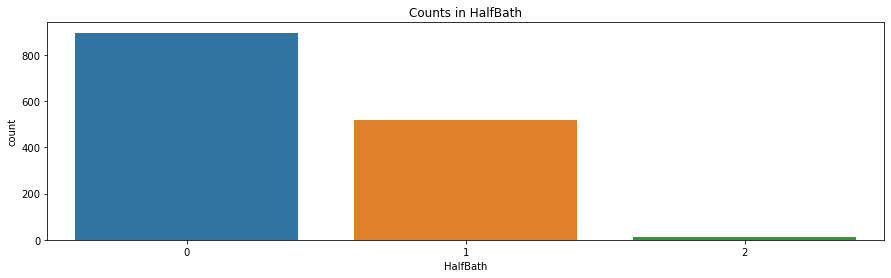

In [102]:
uni_cat('HalfBath', df)

#### `BedroomAbvGr`

Counts of BedroomAbvGr
-------------------------
     #      %
3  793  55.45
2  351  24.55
4  203  14.20
1   48   3.36
5   21   1.47
6    7   0.49
0    6   0.42
8    1   0.07


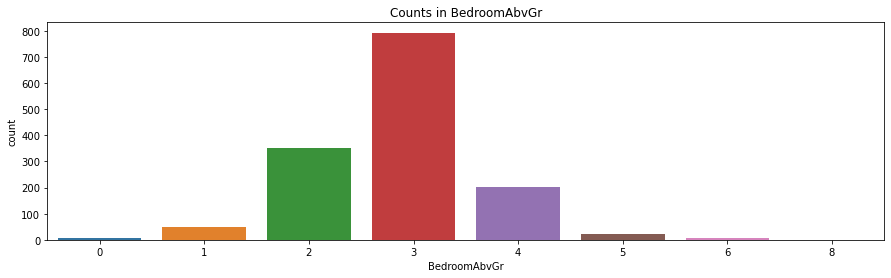

In [103]:
uni_cat('BedroomAbvGr', df)

Counts of BedroomAbvGr
-------------------------
     #      %
3  793  55.45
2  351  24.55
4  203  14.20
1   48   3.36
5   21   1.47
6    7   0.49
0    6   0.42
8    1   0.07


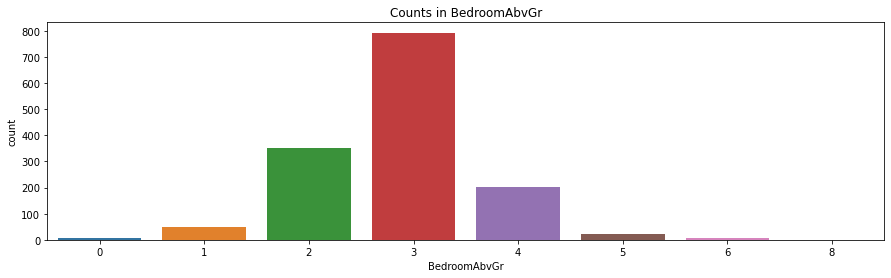

In [104]:
uni_cat('BedroomAbvGr', df)

#### `KitchenQual`

Counts of KitchenQual
-------------------------
      #      %
TA  729  50.98
Gd  576  40.28
Ex   86   6.01
Fa   39   2.73


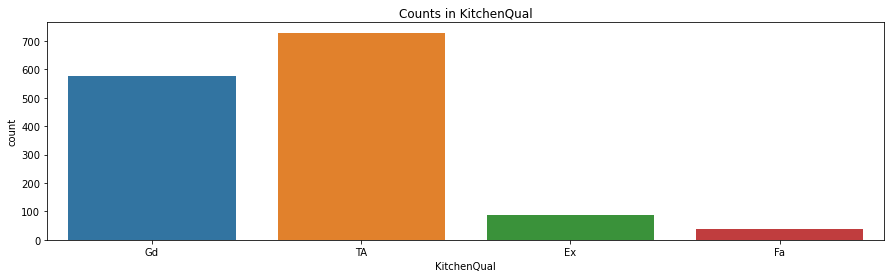

In [105]:
uni_cat('KitchenQual', df)

In [106]:
#Label encoding 'KitchenQual'
df['KitchenQual'] = df['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

Counts of KitchenQual
-------------------------
     #      %
3  729  50.98
4  576  40.28
5   86   6.01
2   39   2.73


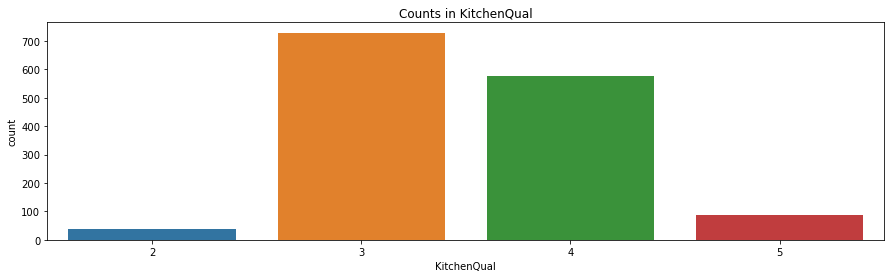

In [107]:
uni_cat('KitchenQual', df)

#### `TotRmsAbvGrd`

Counts of TotRmsAbvGrd
-------------------------
      #      %
6   402  28.11
7   319  22.31
5   275  19.23
8   180  12.59
4    97   6.78
9    70   4.90
10   42   2.94
3    17   1.19
11   16   1.12
12   10   0.70
14    1   0.07
2     1   0.07


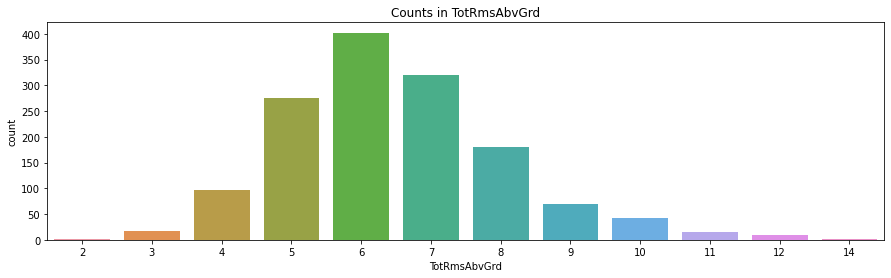

In [108]:
uni_cat('TotRmsAbvGrd', df)

#### `Fireplaces`

Counts of Fireplaces
-------------------------
     #      %
0  689  48.18
1  632  44.20
2  105   7.34
3    4   0.28


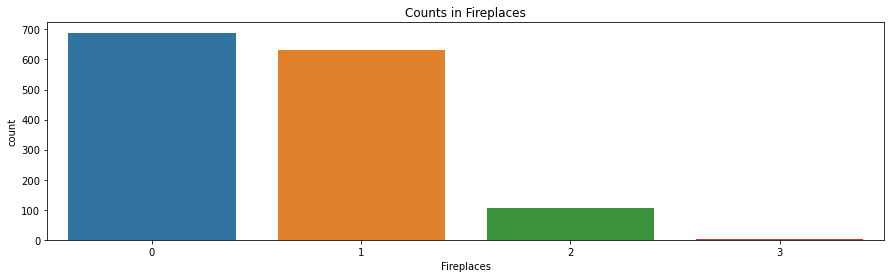

In [109]:
uni_cat('Fireplaces', df)

#### `Garage-`

Counts of GarageType
-------------------------
           #      %
Attchd   843  58.95
Detchd   386  26.99
BuiltIn   87   6.08
NaN       81   5.66
Basment   18   1.26
CarPort    9   0.63
2Types     6   0.42


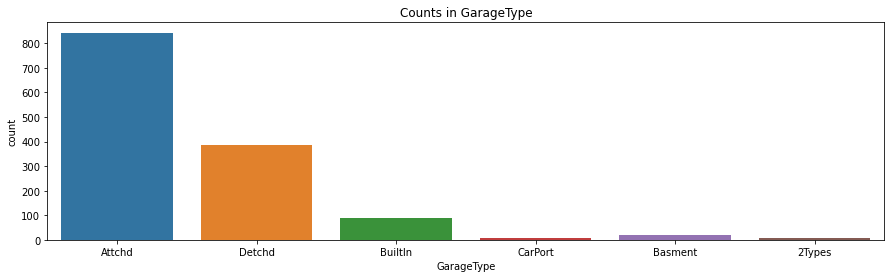

In [110]:
uni_cat('GarageType', df)

__Observations:__
1. Need to change the missing values to `NA` (with an assumption that the data is not missing at random and missin values signify that there is no garage) as specified in data dictionary.
2. Need to club `Basment`,`CarPort`,`2Types` as `Others` to avoid overfitting.

In [111]:
#Filling the null values with 'Missing'
df['GarageType'] = df['GarageType'].fillna('NA')

#Joining categories
df['GarageType'] = df['GarageType'].apply(lambda x: 'Others' if x in ['Basment','CarPort','2Types'] else x)

Counts of GarageType
-------------------------
           #      %
Attchd   843  58.95
Detchd   386  26.99
BuiltIn   87   6.08
NA        81   5.66
Others    33   2.31


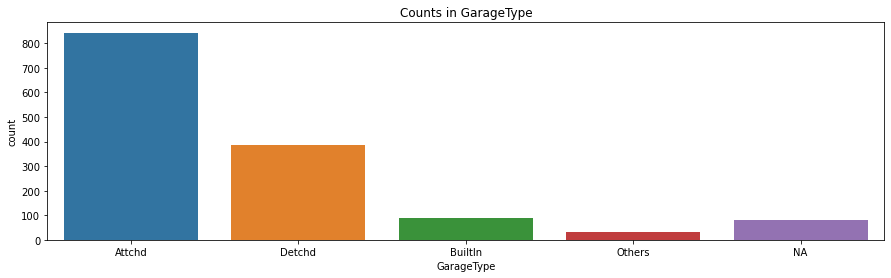

In [112]:
uni_cat('GarageType', df)

Null values in GarageYrBlt: 81
Desription of GarageYrBlt
-------------------------
count    1349.000000
mean     1978.297257
std        24.764766
min      1900.000000
10%      1944.400000
25%      1961.000000
50%      1979.000000
75%      2002.000000
90%      2006.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


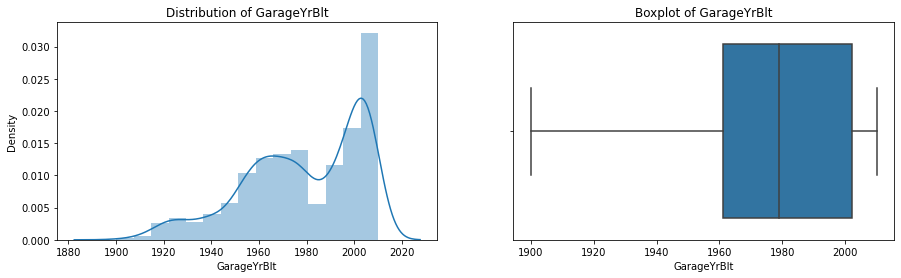

In [113]:
uni_num('GarageYrBlt', df)

We will modify this column to get `GarageAge` from the year.

__`GarageAge = 2021 - GarageYrBlt`__

Also, missing values will be imputed with `-1` which would allow us to identify with a negative value where there are no garages.

In [114]:
#Getting 'GarageAge' column
df['GarageAge'] = 2021 - df['GarageYrBlt']

#Imputing with '-1'
df['GarageAge'] = df['GarageAge'].fillna(-1)

#Dropping original column
df.drop('GarageYrBlt', axis=1, inplace=True)

Counts of GarageFinish
-------------------------
       #      %
Unf  601  42.03
RFn  415  29.02
Fin  333  23.29
NaN   81   5.66


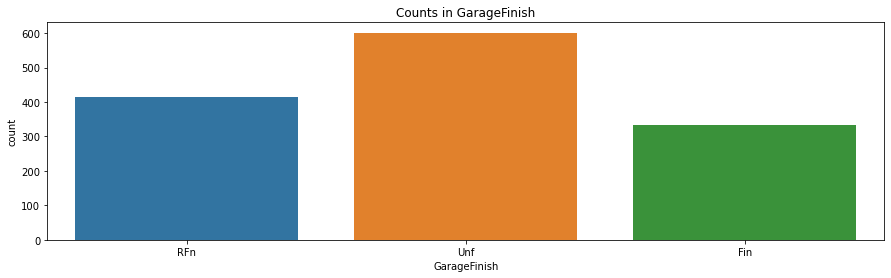

In [115]:
uni_cat('GarageFinish', df)

Label encoding will be performed and missing values will be imputed with `NA` as specified in the data dictionary.

Counts of GarageFinish
-------------------------
     #      %
1  601  42.03
2  415  29.02
3  333  23.29
0   81   5.66


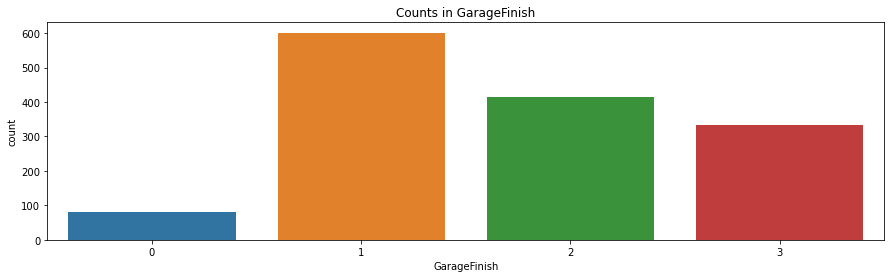

In [116]:
#Label encoding and imputation
df['GarageFinish'] = df['GarageFinish'].fillna('NA')

#Function for encoding
def gf_map(x):
    if x=='Fin':
        return 3
    elif x=='RFn':
        return 2
    elif x=='Unf':
        return 1
    elif x=='NA':
        return 0
    else:
        return x
    
df['GarageFinish'] = df['GarageFinish'].apply(gf_map)

uni_cat('GarageFinish', df)

Counts of GarageCars
-------------------------
     #      %
2  809  56.57
1  369  25.80
3  166  11.61
0   81   5.66
4    5   0.35


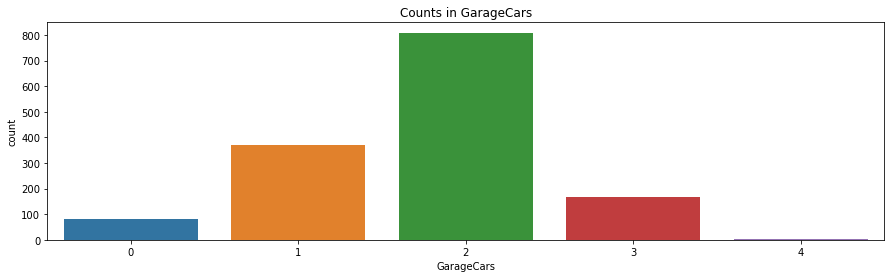

In [117]:
uni_cat('GarageCars', df)

Desription of GarageArea
-------------------------
count    1430.000000
mean      467.267832
std       209.435889
min         0.000000
10%       240.000000
25%       322.500000
50%       474.000000
75%       576.000000
90%       746.200000
95%       840.000000
97%       874.520000
99%       951.970000
99.5%    1040.390000
max      1390.000000
Name: GarageArea, dtype: float64


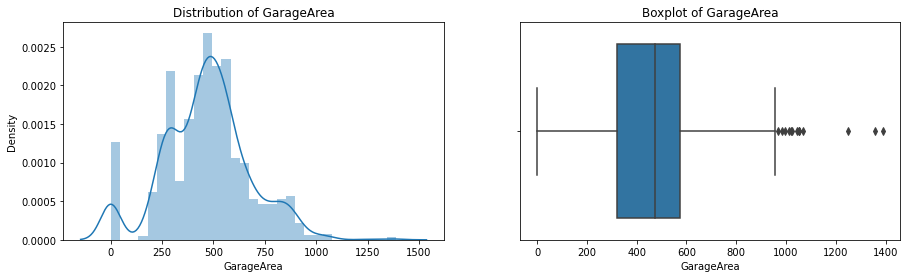

In [118]:
uni_num('GarageArea', df, new_percentiles=[0.95,0.97,0.99,0.995])

Outlier treatment will need to be performed here. Either dropping/capping will be done based on the number of rows with outliers >99th percentile

In [119]:
#Number of rows with outliers
df['GarageArea'][df['GarageArea']>df['GarageArea'].quantile(0.99)].shape[0]

15

The outliers will be dropped since the number of rows is pretty low.

In [120]:
#Dropping the outliers
df = df[df['GarageArea']<=df['GarageArea'].quantile(0.99)]

#### `WoodDeckSF`

Desription of WoodDeckSF
-------------------------
count    1415.000000
mean       93.069965
std       124.800673
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
90%       258.800000
max       857.000000
Name: WoodDeckSF, dtype: float64


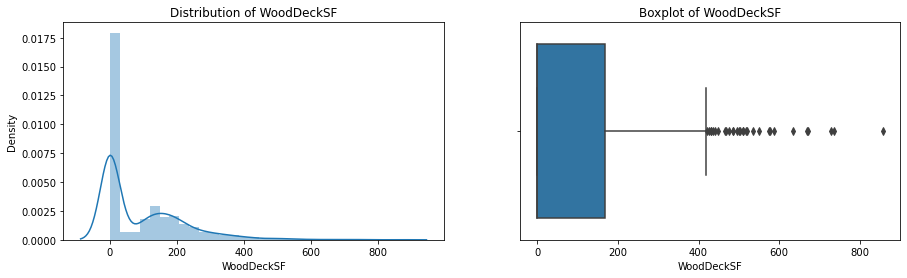

In [121]:
uni_num('WoodDeckSF', df)

Transformation will be required to handle the outliers.

<AxesSubplot:>

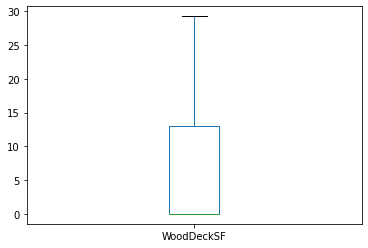

In [122]:
#Checking sqrt transformation
np.sqrt(df['WoodDeckSF']).plot(kind='box')

_Square root_ transformation seems to work well. Thus, this will be done.

In [123]:
#Performing square root transformation
df['WoodDeckSF'] = np.sqrt(df['WoodDeckSF'])

#### `OpenPorchSF`

Desription of OpenPorchSF
-------------------------
count    1415.00000
mean       45.25583
std        64.94725
min         0.00000
10%         0.00000
25%         0.00000
50%        24.00000
75%        66.00000
90%       128.60000
max       547.00000
Name: OpenPorchSF, dtype: float64


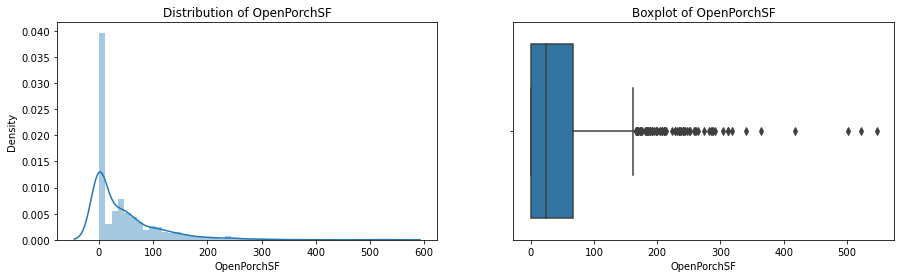

In [124]:
uni_num('OpenPorchSF', df)

Transformation will be required to handle the outliers.

<AxesSubplot:>

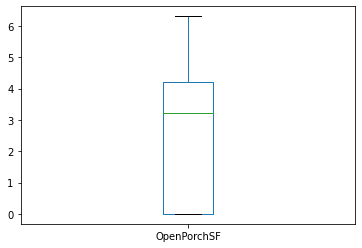

In [125]:
#Checking log transformation
np.log(df['OpenPorchSF']+1).plot(kind='box')

Performing _log_ transofmation since it is able to handle all outliers.

In [126]:
#Performing log transformation
df['OpenPorchSF'] = np.log(df['OpenPorchSF']+1)

#### `EnclosedPorch`

Desription of EnclosedPorch
-------------------------
count    1415.000000
mean       21.866431
std        60.859565
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       112.000000
95%       177.900000
97%       216.000000
99%       258.300000
max       552.000000
Name: EnclosedPorch, dtype: float64


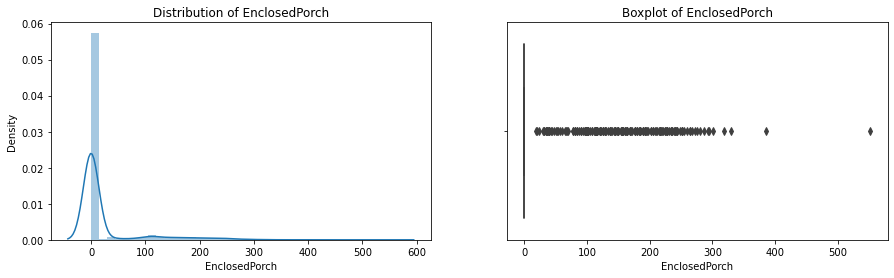

In [127]:
uni_num('EnclosedPorch', df, new_percentiles=[0.95,0.97,0.99])

In [128]:
#Checking number of rows with area as 0
df[df['EnclosedPorch']==0].shape[0]

1213

This feature has majority of values with `0`, due to the extreme skewness it will be dropped.

In [129]:
#Dropping the column
df.drop('EnclosedPorch', axis=1, inplace=True)

#### `ScreenPorch`

Desription of ScreenPorch
-------------------------
count    1415.000000
mean       14.681272
std        55.187781
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


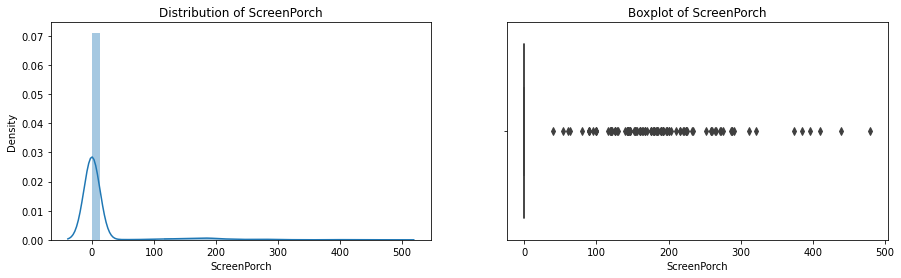

In [130]:
uni_num('ScreenPorch', df)

In [131]:
#Checking number of rows with area as 0
df[df['ScreenPorch']==0].shape[0]

1305

This feature has majority of values with `0`, due to the extreme skewness it will be dropped.

In [132]:
#Dropping the column
df.drop('ScreenPorch', axis=1, inplace=True)

#### `MoSold`

Counts of MoSold
-------------------------
      #      %
6   247  17.46
7   230  16.25
5   196  13.85
4   137   9.68
8   116   8.20
3   102   7.21
10   83   5.87
11   79   5.58
9    62   4.38
12   58   4.10
1    54   3.82
2    51   3.60


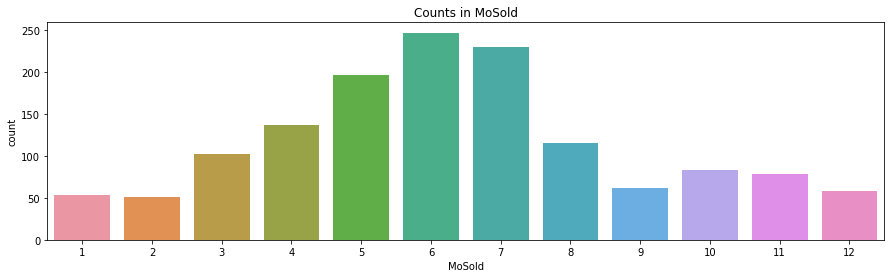

In [133]:
uni_cat('MoSold', df)

#### `YrSold`

Counts of YrSold
-------------------------
        #      %
2009  327  23.11
2007  312  22.05
2006  309  21.84
2008  295  20.85
2010  172  12.16


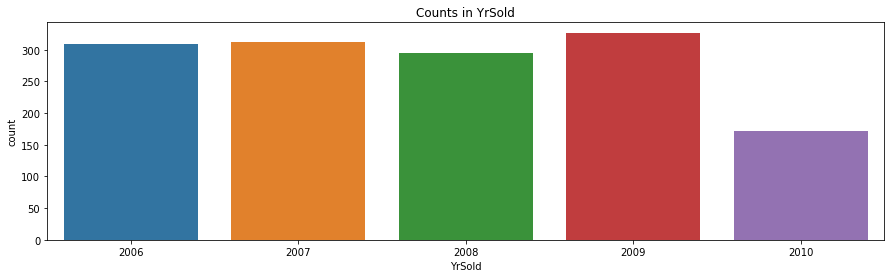

In [134]:
uni_cat('YrSold', df)

The values of this column will not be of much signifcance, hence it will be dropped.

In [135]:
#Dropping the column
df.drop('YrSold', axis=1, inplace=True)

df.shape

(1415, 49)

#### `SaleCondition`

Counts of SaleCondition
-------------------------
            #      %
Normal   1171  82.76
Partial   111   7.84
Abnorml    98   6.93
Family     20   1.41
Alloca     11   0.78
AdjLand     4   0.28


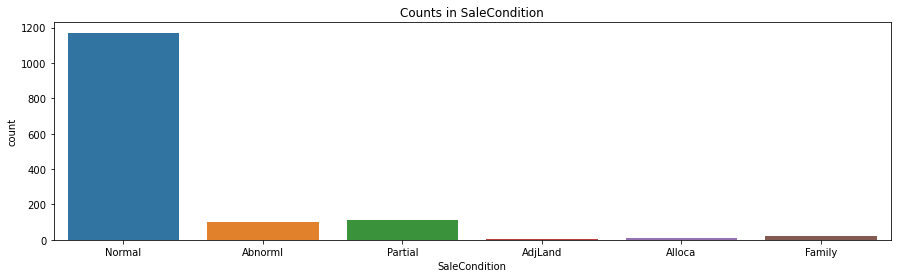

In [136]:
uni_cat('SaleCondition', df)

Categories with < 2% observations will be clubbed as `Others`

In [137]:
#Performing above change
df['SaleCondition'] = df['SaleCondition'].apply(lambda x: 'Others' if x in ['Family', 'Alloca','AdjLand'] else x)

Counts of SaleCondition
-------------------------
            #      %
Normal   1171  82.76
Partial   111   7.84
Abnorml    98   6.93
Others     35   2.47


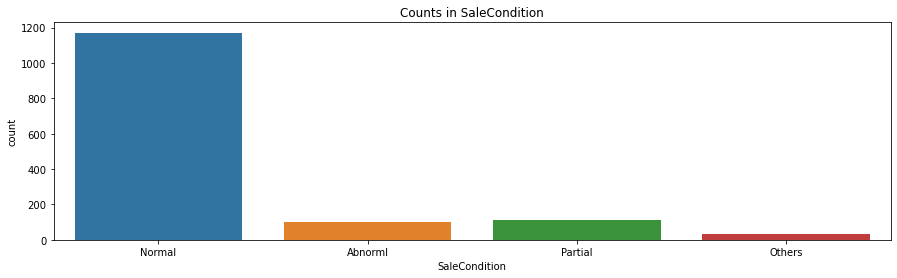

In [138]:
uni_cat('SaleCondition', df)

### `SalePrice` - _Target Column_

Desription of SalePrice
-------------------------
count      1415.000000
mean     176189.266431
std       71252.487273
min       34900.000000
10%      106000.000000
25%      129000.000000
50%      160000.000000
75%      207900.000000
90%      271000.000000
95%      317300.000000
97%      341532.940000
99%      402740.460000
99.5%    439914.600000
max      625000.000000
Name: SalePrice, dtype: float64


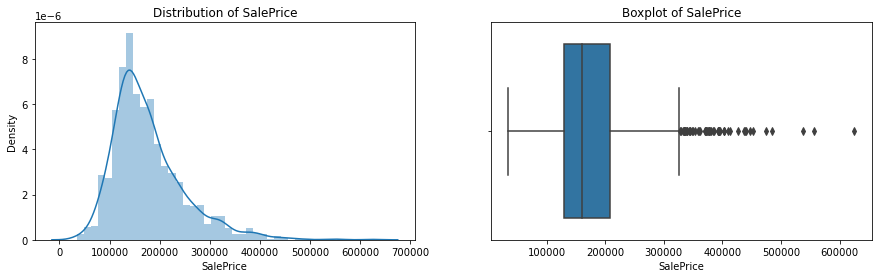

In [139]:
uni_num('SalePrice', df, new_percentiles=[0.95,0.97,0.99,0.995])

The distribution is skewed towardsthe right-side/positively skewed. By employing sqrt/log transformation, we can get it to almost normal.

<AxesSubplot:ylabel='Density'>

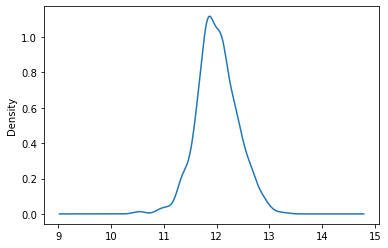

In [140]:
#Checking with log transformation
np.log(df['SalePrice']).plot(kind='kde')

We get a almost normal curve with slight outliers. We will proceed ahead with this transformation.

In [141]:
#Applying tranformation
df['SalePrice'] = np.log(df['SalePrice'])

In [142]:
#Checking null values before moving ahead
null_check(df)

,count,percent


In [143]:
#Checking final shape of the dataset
df.shape

(1415, 49)

In [144]:
#Checking % of rows remaining
round((df.shape[0]/1460)*100,2)

96.92

Retaining 96.92% rows after cleaning is acceptable. Hence, we will move ahead.

### Multivariate Analysis

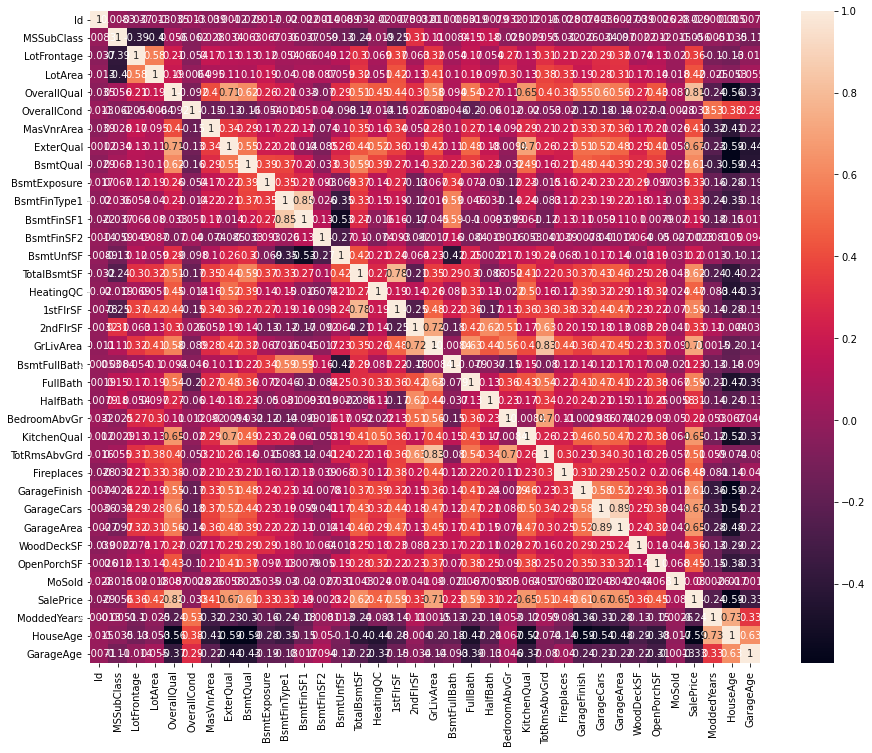

In [145]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Since it's extremely difficult to filter columns based on the correlation heatmap, we will use other feature selection techniques such as:
1. RFE
2. Lasso (if we get better performance)

## Data Preparation

In [146]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,SalePrice,ModdedYears,HouseAge,GarageAge
0,1,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.283204,4,PConc,4,1,6,6.561031,0,12.247449,856,5,856,854,1710.0,1,2,1,3,4,8,0,Attchd,2,2,548,0.000000,4.127134,2,Normal,12.247694,11,18,18.0
1,2,20,RL,80.0,9600.0,Reg,FR,Others,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.000000,3,CBlock,4,4,5,6.886532,0,16.852300,1262,5,1262,0,1262.0,0,2,0,3,3,6,1,Attchd,2,2,460,17.262677,0.000000,5,Normal,12.109011,11,45,45.0
2,3,60,RL,68.0,11250.0,IR,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,5.093750,4,PConc,4,2,6,6.188264,0,20.832667,920,5,920,866,1786.0,1,2,1,3,4,6,1,Attchd,2,2,608,0.000000,3.761200,9,Normal,12.317167,12,20,20.0
3,4,70,RL,60.0,9550.0,IR,Corner,Others,1Fam,2Story,7,5,Gable,Wd Sdng,Others,None,0.000000,3,BrkTil,3,1,5,5.379897,0,23.237900,756,4,961,756,1717.0,1,1,0,3,4,7,1,Detchd,1,3,642,0.000000,3.583519,2,Abnorml,11.849398,66,106,23.0
4,5,60,RL,84.0,14260.0,IR,FR,Others,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,5.860786,4,PConc,4,3,6,6.486161,0,22.135944,1145,5,1145,1053,2198.0,1,2,1,4,4,9,1,Attchd,2,3,836,13.856406,4.442651,12,Normal,12.429216,11,21,21.0


__Observations:__
1. Drop `Id` columns.
2. Convert `MSSubClass` to _categorical/object_ datatype.
3. All the _Object_ columns will go through __OneHotEncoding__ using _pd.get_dummies_
4. All the _columns_ will be scaled with MinMaxScaler.

In [147]:
#Dropping 'Id' column
df.drop('Id', axis=1, inplace=True)

In [148]:
#Converting 'MSSubClass' to 'Object' datatype
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [149]:
#Checking all the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1415 non-null   object 
 1   MSZoning       1415 non-null   object 
 2   LotFrontage    1415 non-null   float64
 3   LotArea        1415 non-null   float64
 4   LotShape       1415 non-null   object 
 5   LotConfig      1415 non-null   object 
 6   Neighborhood   1415 non-null   object 
 7   BldgType       1415 non-null   object 
 8   HouseStyle     1415 non-null   object 
 9   OverallQual    1415 non-null   int64  
 10  OverallCond    1415 non-null   int64  
 11  RoofStyle      1415 non-null   object 
 12  Exterior1st    1415 non-null   object 
 13  Exterior2nd    1415 non-null   object 
 14  MasVnrType     1415 non-null   object 
 15  MasVnrArea     1415 non-null   float64
 16  ExterQual      1415 non-null   int64  
 17  Foundation     1415 non-null   object 
 18  BsmtQual

In [150]:
#Creating dummies
df_final = pd.get_dummies(df, drop_first=True)
print('Shape of final dataset:', df_final.shape)
df_final.head()

Shape of final dataset: (1415, 101)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,ModdedYears,HouseAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SplitFloor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450.0,7,5,5.283204,4,4,1,6,6.561031,0,12.247449,856,5,856,854,1710.0,1,2,1,3,4,8,0,2,2,548,0.000000,4.127134,2,12.247694,11,18,18.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,80.0,9600.0,6,8,0.000000,3,4,4,5,6.886532,0,16.852300,1262,5,1262,0,1262.0,0,2,0,3,3,6,1,2,2,460,17.262677,0.000000,5,12.109011,11,45,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,68.0,11250.0,7,5,5.093750,4,4,2,6,6.188264,0,20.832667,920,5,920,866,1786.0,1,2,1,3,4,6,1,2,2,608,0.000000,3.761200,9,12.317167,12,20,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,60.0,9550.0,7,5,0.000000,3,3,1,5,5.379897,0,23.237900,756,4,961,756,1717.0,1,1,0,3,4,7,1,1,3,642,0.000000,3.583519,2,11.849398,66,106,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,8,5,5.860786,4,4,3,6,6.486161,0,22.135944,1145,5,1145,1053,2198.0,1,2,1,4,4,9,1,2,3,836,13.856406,4.442651,12,12.429216,11,21,21.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [151]:
#Dividing independant and dependant variables
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

#Dividing between train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1061, 100) (354, 100) (1061,) (354,)


In [152]:
#Scaling the variables
scale = MinMaxScaler()

X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scale.transform(X_test), columns=X_test.columns)

In [153]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,ModdedYears,HouseAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SplitFloor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0.460526,0.273658,0.777778,0.428571,0.0,0.666667,0.8,0.75,1.000000,0.925677,0.0,0.292339,0.566651,0.666667,0.589994,0.000000,0.445767,0.333333,0.333333,0.0,0.125,0.666667,0.166667,0.333333,0.666667,0.50,0.596621,0.271131,0.000000,0.636364,0.000000,0.188406,0.311475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.473684,0.180054,0.222222,0.571429,0.0,0.333333,0.6,0.25,0.500000,0.839922,0.0,0.000000,0.252671,1.000000,0.253019,0.000000,0.191167,0.000000,0.333333,0.0,0.375,0.666667,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.363636,0.609756,0.572464,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.592105,0.674143,0.666667,0.428571,0.0,0.666667,0.8,0.25,1.000000,0.866850,0.0,0.359336,0.438458,1.000000,0.350776,0.556176,0.654313,0.333333,0.666667,0.5,0.375,0.666667,0.333333,0.000000,0.666667,0.50,0.656811,0.000000,0.607116,0.454545,0.000000,0.065217,0.172131,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.460526,0.549499,0.555556,0.428571,0.0,0.333333,0.8,0.25,0.166667,0.000000,0.0,0.611851,0.374361,0.666667,0.271420,0.475481,0.537875,0.000000,0.666667,0.5,0.375,0.333333,0.416667,0.333333,1.000000,0.50,0.393875,0.000000,0.588869,0.363636,0.008130,0.108696,0.221311,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.473684,0.600181,0.444444,0.428571,0.0,0.333333,0.6,0.25,0.500000,0.907821,0.0,0.249477,0.483047,1.000000,0.405980,0.000000,0.306736,0.333333,0.333333,0.0,0.375,0.333333,0.250000,0.000000,0.333333,0.25,0.405491,0.000000,0.000000,0.090909,0.000000,0.326087,0.467213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Model Building
#### Procedure to be followed:
1. Select top _50_ features with RFE
2. Build both Lasso and Ridge
3. Perform Hyperparameter tuning on both
4. Select the best model based on RMSE and ${R^2}$
5. Evaluate the coefficients in both cases to get the top 10 features.

In [154]:
#Selecting the top features based on base LinearRegression model
def rfe_n(n, X_train, y_train, X_test):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=n)
    rfe.fit(X_train,y_train)

    #Filtering the dataset
    X_train_rfe = X_train[X_train.columns[rfe.support_]]
    print('Shape of X_train:',X_train_rfe.shape)

    X_test_rfe = X_test[X_test.columns[rfe.support_]]
    print('Shape of X_test:',X_test_rfe.shape)
    
    return X_train_rfe, X_test_rfe

In [155]:
#Selecting the top 50 features
X_train_rfe, X_test_rfe = rfe_n(50, X_train,y_train,X_test)

Shape of X_train: (1061, 50)
Shape of X_test: (354, 50)


In [156]:
#Dataframe to compare metrics
metrics = pd.DataFrame(columns=['Train_R2','Test_R2','Train_RMSE','Test_RMSE']) 

#### Lasso

In [157]:
#Fitting 'Lasso' model with default parameters and 50 features
lasso = Lasso()
lasso.fit(X_train_rfe, y_train)

#Predicting values
y_train_pred = lasso.predict(X_train_rfe)
y_test_pred = lasso.predict(X_test_rfe)

#Imputing scores in 'metrics' df
metrics.loc['Lasso',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5]

#### Ridge

In [158]:
#Fitting 'Ridge' model with default parameters and 50 features
ridge = Ridge()
ridge.fit(X_train_rfe, y_train)

#Predicting values
y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)

#Imputing scores in 'metrics' df
metrics.loc['Ridge',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5]

In [159]:
metrics

,Train_R2,Test_R2,Train_RMSE,Test_RMSE
Lasso,0,-0.000224622,0.381744,0.388224
Ridge,0.921142,0.892662,0.1072,0.127177


- Scores of __Lasso__ turn out to be very bad, acting like a random model.
- Scores of __Ridge__ seem to be promising.

We will proceed ahead with __Hyperparameter tuning__ for both the models and then come to a conclusion.

## Hyperparameter Tuning
- We will perform hyperparameter tuning for most optimum _alpha_ with _5-Fold CV_.
- We will also have to create a new dataframe of metrics for hyperparameter tuned models since we are also performing CV. (This gives us the mean results with different folds, which is not the same in our earlier cases. Thus, hindering a fair comparison.)

In [160]:
params = {'alpha':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,100]}
tuned_metrics = pd.DataFrame(columns=['Train_R2','Test_R2','Train_RMSE','Test_RMSE', 'alpha'])

#### Lasso

In [161]:
#Hyperparameter tuning for 'Lasso'
gscv_lasso = GridSearchCV(lasso, param_grid=params, cv=5, n_jobs=-1, verbose=1, return_train_score=True, scoring='r2')
gscv_lasso.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [162]:
#Best 'alpha' for Lasso
gscv_lasso.best_params_

{'alpha': 0.001}

In [163]:
#Predictions
y_train_pred = gscv_lasso.predict(X_train_rfe)
y_test_pred = gscv_lasso.predict(X_test_rfe)

#Appending scores in 'metrics' df
tuned_metrics.loc['Lasso_Tuned',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5,gscv_lasso.best_params_['alpha']]

In [164]:
#Scoring by the GridSearch
pd.DataFrame(gscv_lasso.cv_results_)[['param_alpha','mean_test_score','mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.001,0.902286,0.912260
1,0.005,0.869692,0.877585
2,0.01,0.817489,0.825573
3,0.05,0.238319,0.242126
4,0.1,-0.000020,0.001314
5,0.5,-0.001246,0.000000
6,1,-0.001246,0.000000
7,5,-0.001246,0.000000
8,10,-0.001246,0.000000
9,100,-0.001246,0.000000


- It is clearly evident that with increase in the _alpha_ values, the model tends perform worse.
- The possibility of coefficients turning to 0 possibly increases drastically with increase in _alpha_ values.

#### Ridge

In [165]:
#Hyperparameter tuning for 'Lasso'
gscv_ridge = GridSearchCV(ridge, param_grid=params, cv=5, n_jobs=-1, verbose=1, return_train_score=True, scoring='r2')
gscv_ridge.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [166]:
#Best 'alpha' for Ridge
gscv_ridge.best_params_

{'alpha': 0.05}

In [167]:
#Predictions
y_train_pred = gscv_ridge.predict(X_train_rfe)
y_test_pred = gscv_ridge.predict(X_test_rfe)

#Appending scores in 'metrics' df
tuned_metrics.loc['Ridge_Tuned',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5,gscv_ridge.best_params_['alpha']]

In [168]:
#Scoring by the GridSearch
pd.DataFrame(gscv_ridge.cv_results_)[['param_alpha','mean_test_score','mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.001,0.910859,0.924319
1,0.005,0.910883,0.924318
2,0.01,0.910909,0.924316
3,0.05,0.911009,0.924262
4,0.1,0.910985,0.924146
5,0.5,0.910042,0.923022
6,1,0.909206,0.921835
7,5,0.904454,0.914712
8,10,0.898077,0.907047
9,100,0.798976,0.805485


### Final metrics

In [169]:
tuned_metrics

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,alpha
Lasso_Tuned,0.911461,0.89107,0.11359,0.128117,0.001
Ridge_Tuned,0.923112,0.889866,0.105852,0.128823,0.05


In [170]:
#Overfit check
tuned_metrics['Train_R2'] - tuned_metrics['Test_R2']

Lasso_Tuned    0.0203917
Ridge_Tuned    0.0332463
dtype: object

__Observations:__
1. The _train score_ in __Lasso_tuned__ model is lower than that of __Ridge_tuned__, but the _Test scores_ seem to be better.
2. The difference between both the scores is __LOWER__ (negligibly) for __Lasso_tuned__, thus lesser overfitting than __Ridge_tuned__.
3. Based on the nature of the models, __Lasso__ would be of better use for us since it has the potential to eradicate insignificant variables by reducing their coefficients to _0_

As of now, the ___Hyperparameters-Tuned_ Lasso Regression__ model seems to be better. We will proceed ahead with comparing the top coefficients and try to relate with the EDA.

In [171]:
#Fitting the 'Lasso'
final_lasso = Lasso(alpha = 0.001)
final_lasso.fit(X_train_rfe,y_train)

#Getting the coefficients
final_lasso_coefs = pd.DataFrame({'lasso_coef':final_lasso.coef_},index=X_train_rfe.columns)

#Storing top variables in a list
lasso_top10 = final_lasso_coefs.abs().sort_values('lasso_coef',ascending=False)[:10].index.tolist()

#Output
final_lasso_coefs.abs().sort_values('lasso_coef',ascending=False)[:10]

,lasso_coef
GrLivArea,0.575624
OverallQual,0.571706
OverallCond,0.331726
HouseAge,0.217655
TotalBsmtSF,0.216598
GarageCars,0.158699
LotArea,0.158373
SaleCondition_Partial,0.104305
Fireplaces,0.097886
KitchenQual,0.092076


In [172]:
#Fitting the 'Ridge'
final_ridge = Ridge(alpha = 0.05)
final_ridge.fit(X_train_rfe,y_train)

#Getting the coefficients
final_ridge_coefs = pd.DataFrame({'ridge_coef':final_ridge.coef_},index=X_train_rfe.columns)

#Storing top 10 features in a list
ridge_top10 = final_ridge_coefs.sort_values('ridge_coef',ascending=False)[:10].index.tolist()

#Output
final_ridge_coefs.sort_values('ridge_coef',ascending=False)[:10]

,ridge_coef
1stFlrSF,0.526368
OverallQual,0.513510
MSZoning_FV,0.494372
2ndFlrSF,0.446515
MSZoning_RL,0.422979
MSZoning_RH,0.403922
OverallCond,0.379618
MSZoning_RM,0.372229
TotalBsmtSF,0.302135
GarageCars,0.156237


__Observation:__ The top 10 features from __Lasso__ seem to be based on different information aspects, unlike __ridge__ where most of the coeficients seem to be highly correlated.


## Final Report:

- On the basis of the difference between the ${R^2}$ scores of both _Train_ and _Test_ sets, __Lasso Regression__ seems to perform better, and will be considered as the final model.

- Going ahead with __Lasso__ as the final model will also benefit us by removing the redundant variables and only considering the features which matter. Thus, lesser complexities.

- The top 10 columns (Highest to lowest importance) which have the highest influence on __`SalePrice`__  are:
	- GrLivArea
	- OverallQual
	- OverallCond
    - HouseAge
    - TotalBsmtSF
	- GarageCars
	- LotArea
	- SaleCondition_Partial
	- Fireplaces
    - KitchenQual

- Apart from the top 10 features, below list consists of all features which have an impact on the final prediction:

In [191]:
#List of all features having an impact
print('List of all the features which matter:')
for n,i in enumerate(final_lasso_coefs.abs().sort_values('lasso_coef',ascending=False)[final_lasso_coefs.lasso_coef>0].index.tolist()):
    print(f'   {n+1}. {i}')

List of all the features which matter:
   1. GrLivArea
   2. OverallQual
   3. OverallCond
   4. TotalBsmtSF
   5. GarageCars
   6. LotArea
   7. SaleCondition_Partial
   8. Fireplaces
   9. KitchenQual
   10. MSZoning_FV
   11. BsmtFinSF1
   12. 1stFlrSF
   13. Foundation_PConc
   14. SaleCondition_Normal
   15. ExterQual
   16. SaleCondition_Others
   17. MSZoning_RL
   18. BsmtFullBath
   19. WoodDeckSF
   20. BsmtExposure
   21. FullBath
   22. MasVnrType_Stone
   23. HalfBath
   24. Exterior1st_Others


# <u>Subjective Questions</u> (codes):

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [173]:
#Optimum alpha value
tuned_metrics[['alpha']]

,alpha
Lasso_Tuned,0.001
Ridge_Tuned,0.05


In [174]:
#Doubling the values of alpha

#doubled scores
doubled_metrics = pd.DataFrame(columns=['Train_R2','Test_R2','Train_RMSE','Test_RMSE', 'alpha'])

#Fitting the 'Lasso'
doubled_lasso = Lasso(alpha = 0.002)
doubled_lasso.fit(X_train_rfe,y_train)
#Predicting values 
y_train_pred = doubled_lasso.predict(X_train_rfe)
y_test_pred = doubled_lasso.predict(X_test_rfe)
#Imputing scores in 'metrics' df
doubled_metrics.loc['Lasso',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5, 0.002]


#Fitting the 'Ridge'
doubled_ridge = Ridge(alpha = 0.1)
doubled_ridge.fit(X_train_rfe,y_train)
#Predicting values
y_train_pred = doubled_ridge.predict(X_train_rfe)
y_test_pred = doubled_ridge.predict(X_test_rfe)
#Imputing scores in 'metrics' df
doubled_metrics.loc['Ridge',:]=[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5, 0.1]

doubled_metrics

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,alpha
Lasso,0.902556,0.88685,0.119165,0.130575,0.002
Ridge,0.923036,0.890872,0.105905,0.128233,0.1


In [175]:
#Getting the coefficients of Lasso
doubled_lasso_coefs = pd.DataFrame({'lasso_coef_doubled':doubled_lasso.coef_},index=X_train_rfe.columns)
lasso_doubled_top10 = doubled_lasso_coefs.abs().sort_values('lasso_coef_doubled',ascending=False)[:10].index.tolist()

pd.DataFrame({'DoubleAlpha':lasso_doubled_top10, 'Alpha':lasso_top10})

,DoubleAlpha,Alpha
0,GrLivArea,GrLivArea
1,OverallQual,OverallQual
2,OverallCond,OverallCond
3,HouseAge,HouseAge
4,TotalBsmtSF,TotalBsmtSF
5,GarageCars,GarageCars
6,LotArea,LotArea
7,KitchenQual,SaleCondition_Partial
8,Fireplaces,Fireplaces
9,BsmtFinSF1,KitchenQual


In [176]:
#Getting the coefficients of Ridge
doubled_ridge_coefs = pd.DataFrame({'ridge_coef_doubled':doubled_ridge.coef_},index=X_train_rfe.columns)
ridge_doubled_top10 = doubled_ridge_coefs.abs().sort_values('ridge_coef_doubled',ascending=False)[:10].index.tolist()

pd.DataFrame({'DoubleAlpha':ridge_doubled_top10, 'Alpha':ridge_top10})

,DoubleAlpha,Alpha
0,OverallQual,1stFlrSF
1,1stFlrSF,OverallQual
2,MSZoning_FV,MSZoning_FV
3,2ndFlrSF,2ndFlrSF
4,MSZoning_RL,MSZoning_RL
5,MSZoning_RH,MSZoning_RH
6,OverallCond,OverallCond
7,MSZoning_RM,MSZoning_RM
8,TotalBsmtSF,TotalBsmtSF
9,HouseAge,GarageCars


__Observations:__

- Upon doubling the alpha values __Lasso__ seems to drop in performance and __Ridge__ seems to have the upper hand in terms of ${R^2}$ score.

- With double alpha value in __Lasso__, `KitchenQual` seems to be more important. Also, `BsmtFinSF1` seems to in the top 10, rather than `SaleCondition_Partial`

- In __Ridge__ with double the alpha value, `OverallQual` seems to be the most important followed by `1stFlrSF` in the second place. This seems to be the opposite of what could have been seen in the case of __ridge with original alpha value__. Also `HouseAge` replaced `GarageCars` at the 10th position.

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [177]:
tuned_metrics

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,alpha
Lasso_Tuned,0.911461,0.89107,0.11359,0.128117,0.001
Ridge_Tuned,0.923112,0.889866,0.105852,0.128823,0.05


A) __`Hyperparameters Tuned Lasso Regression`__ performs better and has been selected as the final model. The reasons for this decision are:
1. Even though the _train_ ${R^2}$ score is lower than that of __ridge__, the difference between _train and test_ ${R^2}$ score is less. Thus, concluding that the model is able to generalize well.
2. __Lasso regression__ has the potential to reduce coefficients of insignifcicant variables to `0`, effectively applying __Feature Selection__. Since the data is huge, feature selection will help us to filter the most important features to report to business.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [178]:
#Creating a dataframe without the currently existing top 5 features
train_temp_df = X_train_rfe.drop(lasso_top10[:5], axis=1)

#Filtering the test set
test_temp_df = X_test_rfe[train_temp_df.columns]

In [179]:
#Fitting a lasso regression with the presently available optimum alpha value
temp_lasso = Lasso(alpha = 0.001)
temp_lasso.fit(train_temp_df,y_train)

#Predicting values 
y_train_pred = temp_lasso.predict(train_temp_df)
y_test_pred = temp_lasso.predict(test_temp_df)

#Imputing scores in 'metrics' df
pd.DataFrame([r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred), mean_squared_error(y_train,y_train_pred)**0.5, mean_squared_error(y_test,y_test_pred)**0.5], index=['Train R2','Test R2','Train RMSE','Test RMSE'], columns=['Score'])

,Score
Train R2,0.874336
Test R2,0.848763
Train RMSE,0.135325
Test RMSE,0.150960


In [180]:
temp_coefs = pd.DataFrame({'lasso_coef':temp_lasso.coef_},index=train_temp_df.columns)

print('Top 5 important features are:')
for n,i in enumerate(temp_coefs.abs().sort_values('lasso_coef', ascending=False)[:5].index.tolist()):
    print('  '+str(n+1)+'. '+i)

Top 5 important features are:
  1. 1stFlrSF
  2. 2ndFlrSF
  3. GarageCars
  4. ExterQual
  5. KitchenQual


### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A) To make sure a model is robust and generalizable; we need to make sure of the blow conditions:
- The metric scores should be high for better prediction, thus avoiding underfitting.
- The metrics scores between training and testing sets must be as close to each other as possible, thus avoiding overfitting.
- By training the model on different sample from the data we have and evaluating the scores, we can get a better idea if the model is able to estimate for all data consistently or not. In other words, applying cross-validation.


When we integrate the above principles in model building, we might have to sometimes sacrifice on an extremely high training score to get it closer to the test score. When this is done, there might sometimes be a drop in the accuracy. 


By good feature engineering, hyperparameter tuning and appropriate data cleaning techniques, we can make sure that the model is generalizable and robust. Even with a sacrifice of some variance/accuracy, we might be able to fulfil the true purpose of a model, i.e. to provide reasonably well future predictions.
